In [1]:
import sys
print(sys.version)

3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC v.1934 64 bit (AMD64)]


In [2]:
import pkg_resources

installed_packages = [pkg.key for pkg in pkg_resources.working_set]
print("tables" in installed_packages)

False


In [3]:
import pandas as pd
import h5py
with h5py.File(r"C:\Users\Gurukumar\Desktop\Accepted_dataset.h5") as f:
    data = f['InputFeatures']['SoundPressure'][:]
    target_labels = f['TargetLabels']['target'][:]
    df = pd.DataFrame(data, columns=['Feature_0'])

In [4]:
df

,Feature_0
0,10.095508
1,10.097378
2,10.190140
3,10.093637
4,10.802822
...,...
2495,67.981951
2496,66.710580
2497,68.681036
2498,60.809686


In [5]:
import numpy as np
X=df
X.drop_duplicates(subset=['Feature_0'])
X=np.abs(X)

In [6]:
X

,Feature_0
0,10.095508
1,10.097378
2,10.190140
3,10.093637
4,10.802822
...,...
2495,67.981951
2496,66.710580
2497,68.681036
2498,60.809686


In [7]:
y=[0,1,2,3,4]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
np.unique(y)

array([0, 1, 2, 3, 4], dtype=int64)

In [8]:
Y=np.array([0,1,2,3,4,5])
y = np.repeat(Y, len(X) // len(Y) + 1)[:len(X)]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=104)
print(len(X_train),len(y_train))

1250 1250


In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_train)

In [11]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM
model=Sequential()
model.add(SimpleRNN(units=32,activation='relu',input_shape=(2,1)))
model.add(Dense(units=10))
model.add(Dense(units=10))
model.compile(optimizer='adam', loss='mse',metrics='accuracy')

In [12]:
model.fit(X_train,y_train,epochs=10,batch_size=30)

Epoch 1/10


42/42 [==============================] - 4s 6ms/step - loss: 49.0772 - accuracy: 0.0000e+00
Epoch 2/10
42/42 [==============================] - 0s 6ms/step - loss: 3.0607 - accuracy: 0.1304
Epoch 3/10
42/42 [==============================] - 0s 5ms/step - loss: 0.8247 - accuracy: 0.1728
Epoch 4/10
42/42 [==============================] - 0s 4ms/step - loss: 0.6232 - accuracy: 0.1752
Epoch 5/10
42/42 [==============================] - 0s 4ms/step - loss: 0.6027 - accuracy: 0.0768
Epoch 6/10
42/42 [==============================] - 0s 3ms/step - loss: 0.6007 - accuracy: 0.0000e+00
Epoch 7/10
42/42 [==============================] - 0s 5ms/step - loss: 0.6003 - accuracy: 0.0000e+00
Epoch 8/10
42/42 [==============================] - 0s 6ms/step - loss: 0.6024 - accuracy: 0.0000e+00
Epoch 9/10
42/42 [==============================] - 0s 6ms/step - loss: 0.5979 - accuracy: 0.0000e+00
Epoch 10/10
42/42 [==============================] - 0s 6ms/step - loss: 0.5970 - accuracy: 0.0

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense

X=np.array(X_train)
X = np.hstack([X, X])  # Duplicate the single feature to create two columns

Y=np.array([0,1,2,3,4])
Y_adjusted = np.repeat(Y, len(X_train) // len(Y) + 1)[:len(X_train)]
model = keras.Sequential([
    keras.layers.Dense(6, input_shape=(2,), activation='sigmoid')
])

model.compile(
    optimizer='adam',  # Corrected: 'optimizer' instead of 'optimize'
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X,Y_adjusted, epochs=10)  # Corrected: 'epochs' instead of 'epoch'


Epoch 1/10
40/40 [==============================] - 1s 5ms/step - loss: 27.5384 - accuracy: 0.0000e+00
Epoch 2/10
40/40 [==============================] - 0s 5ms/step - loss: 23.7473 - accuracy: 0.0224
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 21.3055 - accuracy: 0.0688
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 19.0693 - accuracy: 0.0536
Epoch 5/10
40/40 [==============================] - 0s 4ms/step - loss: 16.8991 - accuracy: 0.0896
Epoch 6/10
40/40 [==============================] - 0s 2ms/step - loss: 15.3725 - accuracy: 0.2024
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 14.1256 - accuracy: 0.1984
Epoch 8/10
40/40 [==============================] - 0s 4ms/step - loss: 12.7943 - accuracy: 0.1952
Epoch 9/10
40/40 [==============================] - 0s 4ms/step - loss: 11.4925 - accuracy: 0.2024
Epoch 10/10
40/40 [==============================] - 0s 3ms/step - loss: 10.1609 - accuracy: 0.2000


In [14]:
print(Y_adjusted.size)

1250


In [15]:
Y_adjusted_reshaped = np.repeat(Y, X.shape[0] // len(Y))
print(Y_adjusted_reshaped.size)
print(X.size)

1250
2500


In [16]:
df2=pd.DataFrame(Y_adjusted_reshaped,columns=['Values'])
df2

,Values
0,0
1,0
2,0
3,0
4,0
...,...
1245,4
1246,4
1247,4
1248,4


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
 
warnings.filterwarnings('ignore')

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor model
rf_regressor = RandomForestRegressor(n_estimators=700, random_state=0)

# Fit the model to the data
rf_regressor.fit(X, Y_adjusted)

# Predict using the trained model
y_pred = rf_regressor.predict(X)


In [19]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
X=abs(X)
# Convert y_pred to a format compatible with RNN input
y_pred_rnn = np.expand_dims(y_pred, axis=1)

# Define and compile the RNN model
rnn_model = Sequential([
    LSTM(units=64, input_shape=(1, 1)),  # LSTM layer with 64 units
    Dense(units=1)  # Output layer
])

rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the RNN model using y_pred_rnn as input and Y_adjusted as target
rnn_model.fit(y_pred_rnn, Y_adjusted, epochs=10)

Epoch 1/10
40/40 [==============================] - 6s 6ms/step - loss: 4.8008
Epoch 2/10
40/40 [==============================] - 0s 6ms/step - loss: 2.7933
Epoch 3/10
40/40 [==============================] - 0s 6ms/step - loss: 1.2618
Epoch 4/10
40/40 [==============================] - 0s 6ms/step - loss: 0.6202
Epoch 5/10
40/40 [==============================] - 0s 6ms/step - loss: 0.5226
Epoch 6/10
40/40 [==============================] - 0s 8ms/step - loss: 0.4831
Epoch 7/10
40/40 [==============================] - 0s 8ms/step - loss: 0.4448
Epoch 8/10
40/40 [==============================] - 0s 8ms/step - loss: 0.4110
Epoch 9/10
40/40 [==============================] - 0s 5ms/step - loss: 0.3813
Epoch 10/10
40/40 [==============================] - 0s 7ms/step - loss: 0.3550


In [20]:
X=abs(X)
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report
X=np.array(X_train)
Y=np.array([0,1,2,3,4])
Y_adjusted = np.repeat(Y, len(X_train) // len(Y) + 1)[:len(X_train)]
model = keras.Sequential([
    keras.layers.Dense(6, input_shape=(1,), activation='sigmoid')
])

model.compile(
    optimizer='adam',  # Corrected: 'optimizer' instead of 'optimize'
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(y_pred,Y_adjusted, epochs=10)  # Corrected: 'epochs' instead of 'epoch'


Epoch 1/10
40/40 [==============================] - 1s 4ms/step - loss: 2.2632 - accuracy: 0.0560
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 2.1863 - accuracy: 0.2008
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 2.1190 - accuracy: 0.1664
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 2.0589 - accuracy: 0.1944
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 2.0031 - accuracy: 0.2040
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 1.9497 - accuracy: 0.2048
Epoch 7/10
40/40 [==============================] - 0s 5ms/step - loss: 1.9020 - accuracy: 0.2064
Epoch 8/10
40/40 [==============================] - 0s 4ms/step - loss: 1.8577 - accuracy: 0.2072
Epoch 9/10
40/40 [==============================] - 0s 3ms/step - loss: 1.8165 - accuracy: 0.2072
Epoch 10/10
40/40 [==============================] - 0s 4ms/step - loss: 1.7788 - accuracy: 0.2128


In [21]:
import numpy as np
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense

# Define custom accuracy metric for regression
def custom_accuracy(y_true, y_pred):
    # Set a threshold for correctness
    threshold = 1.7  # Adjust as needed based on your problem

    # Calculate absolute difference between true and predicted values
    diff = K.abs(y_true - y_pred)
    
    # Check if the absolute difference is within the threshold
    correct = K.cast(K.less_equal(diff, threshold), K.floatx())
    
    # Calculate accuracy as the mean of correct predictions
    return K.mean(correct)

# Assuming X_train, y_pred, and Y_adjusted are already defined

# Define and compile the model
model = Sequential([
    Dense(10, input_shape=(1,), activation='relu'),  # Example hidden layer
    Dense(1)  # Output layer for regression (linear activation is default)
])
X
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[custom_accuracy])

# Fit the model using y_pred and Y_adjusted directly
model.fit(y_pred, Y_adjusted, epochs=10)


Epoch 1/10
40/40 [==============================] - 2s 6ms/step - loss: 6.3345 - custom_accuracy: 0.4039
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 5.3163 - custom_accuracy: 0.4156
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 4.4474 - custom_accuracy: 0.5547
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 3.6581 - custom_accuracy: 0.5883
Epoch 5/10
40/40 [==============================] - 0s 6ms/step - loss: 2.9147 - custom_accuracy: 0.6000
Epoch 6/10
40/40 [==============================] - 0s 7ms/step - loss: 2.2544 - custom_accuracy: 0.6672
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 1.7186 - custom_accuracy: 0.7648
Epoch 8/10
40/40 [==============================] - 0s 7ms/step - loss: 1.3019 - custom_accuracy: 0.8156
Epoch 9/10
40/40 [==============================] - 0s 8ms/step - loss: 1.0013 - custom_accuracy: 0.9187
Epoch 10/10
40/40 [==============================] - 0s

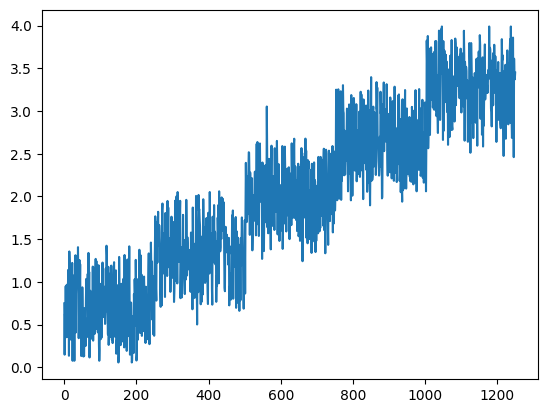

In [22]:
plt.plot(y_pred)

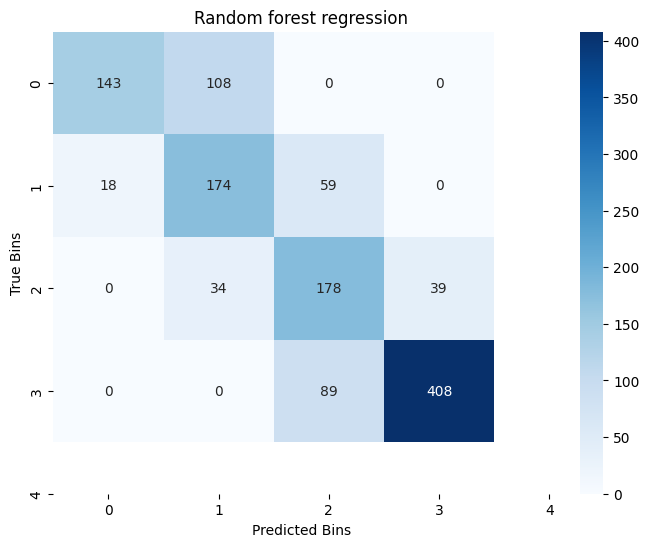

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_pred and Y_adjusted are your model's predictions and true values
# Replace y_pred and Y_adjusted with actual data arrays if not already defined.

# 1. Create Bins for Regression Output
num_bins = 5  # Number of categories or bins

# Define bin edges with inclusive range
bin_edges = np.linspace(min(Y_adjusted), max(Y_adjusted), num_bins + 1)  # Define the bin edges

# np.digitize returns indices in the range [1, len(bin_edges)], so subtract 1 to zero-index
y_true_bins = np.digitize(Y_adjusted, bins=bin_edges, right=False)   # True values bin indices
y_pred_bins = np.digitize(y_pred, bins=bin_edges, right=False)  # Predicted values bin indices

# To ensure the bins are limited to [0, num_bins - 1]
y_true_bins = np.clip(y_true_bins, 0, num_bins - 1)
y_pred_bins = np.clip(y_pred_bins, 0, num_bins - 1)

# 2. Compute the Confusion Matrix
cm = confusion_matrix(y_true_bins, y_pred_bins)

# 3. Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_bins), yticklabels=range(num_bins))
plt.title('Random forest regression')
plt.xlabel('Predicted Bins')
plt.ylabel('True Bins')

# Save the plot before displaying it
save_path = r'C:\Users\Gurukumar\Documents\Projects\ML\Random_forest\Random forest regression.png'
plt.savefig(save_path)

# Now show the plot
plt.show()


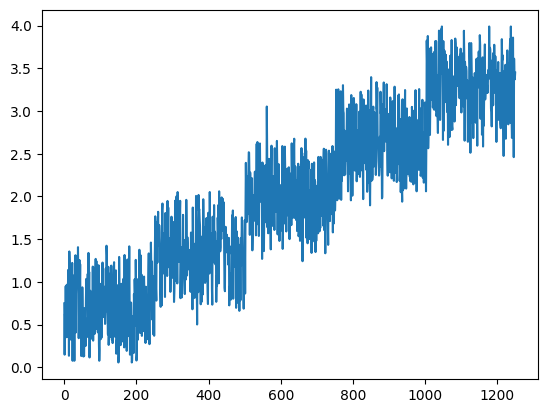

In [24]:
plt.plot(y_pred)

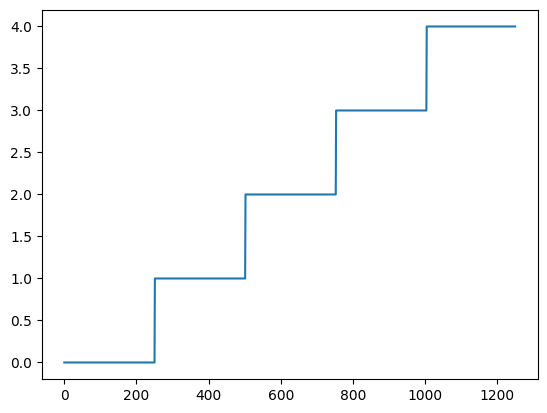

In [25]:
plt.plot(Y_adjusted)

In [26]:
from keras.metrics import Precision, Recall
from keras.models import Sequential
from keras.layers import Dense

# Define custom F1 score metric
def custom_f1_score(y_true, y_pred):
    # Convert predictions to binary values based on the threshold
    binary_pred = K.round(y_pred)
    
    # Calculate true positives, false positives, and false negatives
    true_positives = K.sum(K.round(y_true * binary_pred))
    false_positives = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)))
    false_negatives = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)))
    
    # Calculate precision and recall
    precision = true_positives / (true_positives + false_positives + K.epsilon())
    recall = true_positives / (true_positives + false_negatives + K.epsilon())
    
    # Calculate F1 score
    f1_score = 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    
    return f1_score

# Define and compile the model with custom metrics
model = Sequential([
    Dense(10, input_shape=(1,), activation='relu'),  
    Dense(1)  
])

model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=[custom_accuracy, custom_f1_score, Precision()])

# Fit the model using y_pred and Y_adjusted directly
model.fit(y_pred, Y_adjusted, epochs=10)


Epoch 1/10
40/40 [==============================] - 2s 3ms/step - loss: 2.1955 - custom_accuracy: 0.6758 - custom_f1_score: 0.8679 - precision: 0.9308
Epoch 2/10
40/40 [==============================] - 0s 5ms/step - loss: 1.2055 - custom_accuracy: 0.8586 - custom_f1_score: 0.9105 - precision: 0.8618
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.7248 - custom_accuracy: 0.9773 - custom_f1_score: 0.9338 - precision: 0.8236
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5480 - custom_accuracy: 0.9992 - custom_f1_score: 0.9411 - precision: 0.8142
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4941 - custom_accuracy: 1.0000 - custom_f1_score: 0.9465 - precision: 0.8129
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 0.4714 - custom_accuracy: 1.0000 - custom_f1_score: 0.9259 - precision: 0.8129
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.4544 - custom_accura

Random forest classification


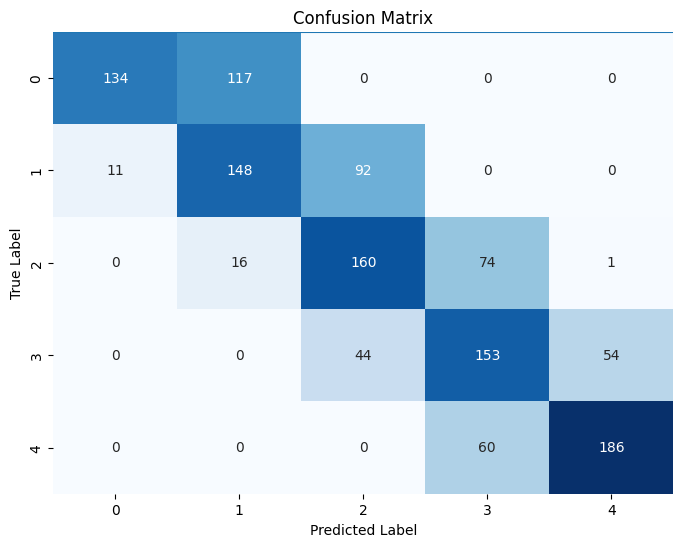

In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Example continuous prediction values
 # Replace with your predicted continuous values
Y = np.array([0, 1, 2, 3, 4])  # True class labels
Y_adjusted = np.repeat(Y, len(y_pred) // len(Y) + 1)[:len(y_pred)]


# Define bin edges for 6 bins (0 to 5)
bins = np.linspace(0, 3,5)  # Adjust these values based on the range of your `y_pred`

# Convert continuous values to discrete bins
y_pred_discrete = np.digitize(y_pred, bins) - 1  # `-1` to get zero-based index

# Calculate confusion matrix
cm = confusion_matrix(Y_adjusted, y_pred_discrete)

# Print confusion matrix
print("Random forest classification")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.plot(Y_adjusted)
save_path = r"C:\Users\Gurukumar\Documents\Projects\ML\Random_forest\Random forest classification.png"  # Specify your path and filename
plt.savefig(save_path)

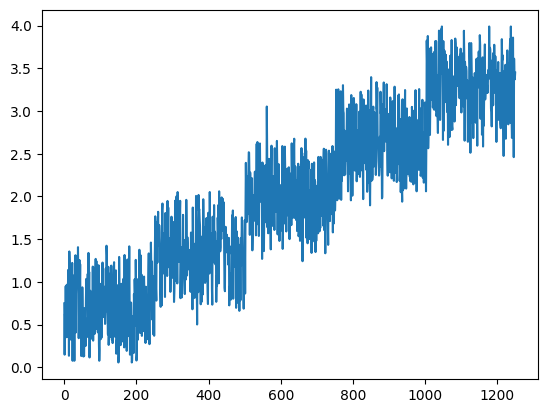

In [28]:
plt.plot(y_pred)

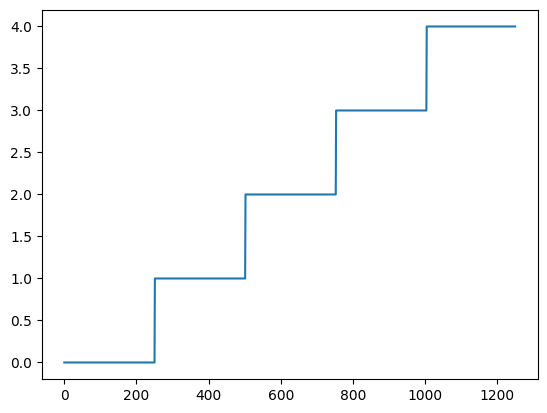

In [29]:
plt.plot(Y_adjusted)

Epoch 1/10
40/40 [==============================] - 2s 4ms/step - loss: 5.1896 - custom_accuracy: 0.4289 - custom_f1_score: 0.0571 - precision_1: 1.0000   
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 3.6065 - custom_accuracy: 0.6109 - custom_f1_score: 0.8030 - precision_1: 0.9971
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 2.5213 - custom_accuracy: 0.6125 - custom_f1_score: 0.8555 - precision_1: 0.9012
Epoch 4/10
40/40 [==============================] - 0s 5ms/step - loss: 1.7344 - custom_accuracy: 0.7664 - custom_f1_score: 0.8864 - precision_1: 0.8552
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 1.2112 - custom_accuracy: 0.8477 - custom_f1_score: 0.9107 - precision_1: 0.8311
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.8881 - custom_accuracy: 0.9383 - custom_f1_score: 0.9164 - precision_1: 0.8142
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.7085 

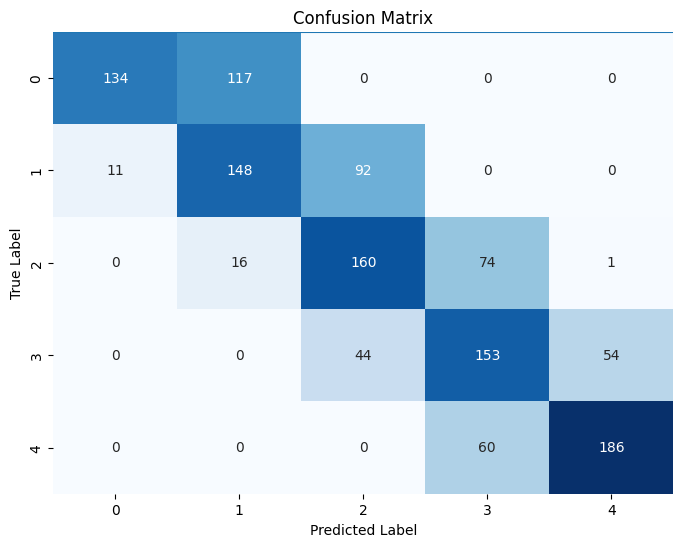

In [30]:
from keras.metrics import Precision, Recall
from keras.models import Sequential
from keras.layers import Dense

# Define custom F1 score metric
def custom_f1_score(y_true, y_pred):
    # Convert predictions to binary values based on the threshold
    binary_pred = K.round(y_pred)
    
    # Calculate true positives, false positives, and false negatives
    true_positives = K.sum(K.round(y_true * binary_pred))
    false_positives = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)))
    false_negatives = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)))
    
    # Calculate precision and recall
    precision = true_positives / (true_positives + false_positives + K.epsilon())
    recall = true_positives / (true_positives + false_negatives + K.epsilon())
    
    # Calculate F1 score
    f1_score = 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    
    return f1_score

# Define and compile the model with custom metrics
model = Sequential([
    Dense(10, input_shape=(1,), activation='relu'),  
    Dense(1)  
])

model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=[custom_accuracy, custom_f1_score, Precision()])

# Fit the model using y_pred and Y_adjusted directly
model.fit(y_pred, Y_adjusted, epochs=10)
bins = np.linspace(0, 3,5)  # Adjust these values based on the range of your `y_pred`

# Convert continuous values to discrete bins
y_pred_discrete = np.digitize(y_pred, bins) - 1  # `-1` to get zero-based index

# Calculate confusion matrix
cm = confusion_matrix(Y_adjusted, y_pred_discrete)

# Print confusion matrix
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.plot(Y_adjusted)
save_path = r"C:\Users\Gurukumar\Documents\Projects\ML\Random_forest\Random forest classification1.png"  # Specify your path and filename
plt.savefig(save_path)


In [31]:
# Assuming X_train, y_pred, and Y_adjusted are defined correctly and X is your original dataset

# Convert `y_pred` and `Y_adjusted` to numpy arrays if not already
import numpy as np
y_pred = np.array(y_pred)
Y_adjusted = np.array(Y_adjusted)

# Ensure that X is in a 2D format
y_pred = y_pred.reshape(-1, 1)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(y_pred, Y_adjusted[:len(y_pred)], test_size=0.6, random_state=42)

# Reshape X_train and X_test to be 2D arrays as required by sklearn
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Create individual decision tree classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

tree1 = RandomForestClassifier(n_estimators=200, random_state=42)
tree2 = RandomForestClassifier(n_estimators=200, random_state=42)
tree3 = RandomForestClassifier(n_estimators=200, random_state=42)

# Train each decision tree classifier on the training data
tree1.fit(X_train, y_train)
tree2.fit(X_train, y_train)
tree3.fit(X_train, y_train)

# Make predictions using each individual decision tree classifier
pred1 = tree1.predict(X_test)
pred2 = tree2.predict(X_test)
pred3 = tree3.predict(X_test)

# Combine predictions using majority voting
# Convert predictions to numerical classes, as RandomForest outputs numerical predictions
ensemble_pred = (pred1 + pred2 + pred3) // 3

# Calculate the accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Ensemble Accuracy:", ensemble_accuracy)


Ensemble Accuracy: 0.5586666666666666


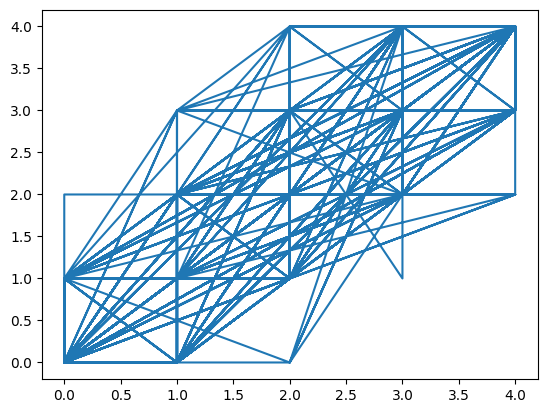

In [32]:
plt.plot(y_test,ensemble_pred)

In [33]:
print(len(X))

1250


In [34]:
print(len(Y_adjusted))

1250


In [35]:
from sklearn.svm import SVC

# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming X_train, y_pred, and Y_adjusted are defined

# Create Y_adjusted with the same length as X
Y = np.array([0, 1, 2, 3, 4])
Y_adjusted = np.repeat(Y, len(y_pred) // len(Y) + 1)[:len(y_pred)]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y_adjusted[:len(y_pred)], test_size=0.6, random_state=42)

# Create individual SVM classifiers
svm1 = SVC(kernel='linear', random_state=42)
svm2 = SVC(kernel='rbf', random_state=42)
svm3 = SVC(kernel='poly', degree=3, random_state=42)

# Train each SVM classifier on the training data
svm1.fit(X_train, y_train)
svm2.fit(X_train, y_train)
svm3.fit(X_train, y_train)

# Make predictions using each individual SVM classifier
pred1 = svm1.predict(X_test)
pred2 = svm2.predict(X_test)
pred3 = svm3.predict(X_test)

# Combine predictions using majority voting
ensemble_pred = (pred1 + pred2 + pred3) // 3

# Calculate the accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Ensemble Accuracy:", ensemble_accuracy)

# Perform cross-validation to get a better estimate of the model's performance
cv_scores = cross_val_score(SVC(kernel='linear', random_state=42), y_pred, Y_adjusted, cv=5)
print("Cross-Validation Mean Accuracy:", np.mean(cv_scores))


Ensemble Accuracy: 0.18133333333333335
Cross-Validation Mean Accuracy: 0.6408


In [36]:
df
print(len(df))

2500


In [37]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
Y=np.array([0,1,2,3,4])
Y_adjusted = np.repeat(Y, len(df) // len(Y) + 1)[:len(df)]
# Assuming dfs_df is the features dataframe and Y_adjusted is the target labels
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df, Y_adjusted, test_size=0.3, random_state=42)

# Create and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_model.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       158
           1       0.99      0.96      0.97       139
           2       0.96      0.99      0.97       155
           3       0.99      0.99      0.99       164
           4       0.99      1.00      1.00       134

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



In [38]:
import pandas as pd

dfs = {'mean': [], 'median': [], 'mode': [], 'variance': [], 'std': [],
       '1st quartile': [], '3rd quartile': [], 'iqr': [], 'skew': [],
       'kurt': [], 'max': [], 'min': [], 'range': []}
Xdf = pd.DataFrame(df)  # Assuming df is your data
c = 0
for i in range(0, len(df), 10):
    subset = Xdf.iloc[i:i + 100]  # Slice the DataFrame
    if not subset.empty:  # Check if the subset is not empty
        dfs['mean'].append(subset['Feature_0'].mean())
        dfs['median'].append(subset['Feature_0'].median())
        dfs['mode'].append(subset['Feature_0'].mode().values[0])  # mode() returns a Series, take the first value
        dfs['variance'].append(subset['Feature_0'].var())
        dfs['std'].append(subset['Feature_0'].std())
        dfs['1st quartile'].append(subset['Feature_0'].quantile(0.25))
        dfs['3rd quartile'].append(subset['Feature_0'].quantile(0.75))
        dfs['iqr'].append(subset['Feature_0'].quantile(0.75) - subset['Feature_0'].quantile(0.25))
        dfs['skew'].append(subset['Feature_0'].skew())
        dfs['kurt'].append(subset['Feature_0'].kurt())
        dfs['max'].append(subset['Feature_0'].max())
        dfs['min'].append(subset['Feature_0'].min())
        dfs['range'].append(subset['Feature_0'].max() - subset['Feature_0'].min())


In [39]:
dfs_df = pd.DataFrame(dfs)  
dfs_df

,mean,median,mode,variance,std,1st quartile,3rd quartile,iqr,skew,kurt,max,min,range
0,10.750890,10.608694,10.410077,0.543896,0.737493,10.262237,11.053337,0.791100,2.368985,7.427040,13.901016,10.003493,3.897523
1,10.764920,10.600278,10.410077,0.584468,0.764505,10.274674,11.053337,0.778663,2.229173,6.262133,13.901016,10.000875,3.900141
2,10.775401,10.570168,10.410077,0.590565,0.768482,10.284212,11.046137,0.761925,2.212314,6.010246,13.901016,10.000875,3.900141
3,10.840043,10.701457,10.410077,0.607751,0.779584,10.295901,11.115428,0.819527,2.013021,5.060938,13.901016,10.000875,3.900141
4,10.886413,10.728014,10.410077,0.606128,0.778542,10.344339,11.150120,0.805781,1.920610,4.659628,13.901016,10.000875,3.900141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,67.384194,65.555537,60.067960,43.442509,6.591093,62.732077,70.374701,7.642623,1.422403,1.942764,88.118155,60.067960,28.050195
246,68.168308,66.644562,60.067960,48.561959,6.968641,63.121175,70.659721,7.538546,1.255464,1.276583,88.118155,60.067960,28.050195
247,68.922306,67.311480,60.433773,58.387665,7.641182,62.864301,72.119329,9.255027,1.057798,0.466852,88.118155,60.433773,27.684382
248,69.629141,67.947165,60.663061,68.953711,8.303837,63.257046,74.109048,10.852002,0.988631,0.145349,88.118155,60.663061,27.455094


Original dfs_df shape: (250, 10)
Target Y_adjusted shape: (250,)


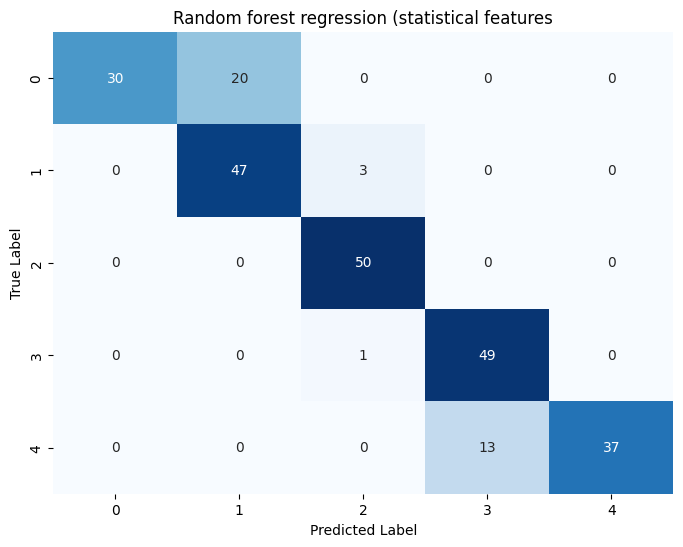

Confusion Matrix:
 [[30 20  0  0  0]
 [ 0 47  3  0  0]
 [ 0  0 50  0  0]
 [ 0  0  1 49  0]
 [ 0  0  0 13 37]]
Standard Accuracy: 0.85
Custom Accuracy (±1 tolerance): 1.00
Epoch 1/10
8/8 [==============================] - 6s 14ms/step - loss: 17.9619 - custom_accuracy_metric: 0.1989
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 17.0451 - custom_accuracy_metric: 0.2007
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 16.1580 - custom_accuracy_metric: 0.1989
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 15.3230 - custom_accuracy_metric: 0.1989
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 14.5433 - custom_accuracy_metric: 0.2007
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 13.8197 - custom_accuracy_metric: 0.2007
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 13.1063 - custom_accuracy_metric: 0.1998
Epoch 8/10
8/8 [==============================] - 0

In [52]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

# Assuming dfs_df is your feature matrix DataFrame with columns and values
# Create the feature matrix DataFrame `dfs_df` from your original data
dfs_df = pd.DataFrame(np.random.rand(250, 10))  # Replace with your original data
print("Original dfs_df shape:", dfs_df.shape)

# Step 1: Define the number of classes and samples per class based on dfs_df
num_classes = 5

# Step 2: Create the adjusted target variable `Y_adjusted` with the calculated number of samples per class
samples_per_class = len(dfs_df) // num_classes  # 250 rows / 5 classes = 50 samples per class
Y_adjusted = np.repeat(np.arange(num_classes), samples_per_class)

# If there are remaining rows not included in the target variable, adjust accordingly
Y_adjusted2 = np.append(Y_adjusted2, np.zeros(len(dfs_df) - len(Y_adjusted)))
assert len(Y_adjusted2) == len(dfs_df), f"Target variable Y_adjusted should have {len(dfs_df)} entries, but has {len(Y_adjusted)}."

print("Target Y_adjusted shape:", Y_adjusted.shape)  # Should print (250,)

# Step 3: Train Random Forest Regressor using the existing `dfs_df` and `Y_adjusted`
rf_regressor = RandomForestRegressor(n_estimators=700, random_state=42)
rf_regressor.fit(dfs_df, Y_adjusted2)

# Step 4: Predict using the trained model
y_pred = rf_regressor.predict(dfs_df)

# Step 5: Discretize the predicted values to match target classes
bins = np.linspace(min(Y_adjusted2), max(Y_adjusted2), num_classes + 1)  # Creates bins for 0, 1, 2, 3, 4
y_pred_discrete = np.digitize(y_pred, bins) - 1  # Convert continuous predictions to discrete classes
y_pred_discrete = np.clip(y_pred_discrete, 0, num_classes - 1)  # Clip values to ensure they stay within class range

# Step 6: Calculate confusion matrix and display
cm = confusion_matrix(Y_adjusted2, y_pred_discrete)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Random forest regression (statistical features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
save_path = r"C:\Users\Gurukumar\Documents\Projects\ML\Random_forest\Random forest statistics.png"  # Specify your path and filename
plt.savefig(save_path)
plt.show()

print("Confusion Matrix:\n", cm)

# Step 7: Calculate standard classification accuracy
accuracy = accuracy_score(Y_adjusted2, y_pred_discrete)
print(f"Standard Accuracy: {accuracy:.2f}")

# Step 8: Calculate custom accuracy using a threshold
def custom_accuracy_metric(y_true, y_pred, threshold=1):
    # Calculate custom accuracy: how many predictions are within the threshold of the true class
    return K.mean(K.less_equal(K.abs(y_true - y_pred), threshold))

# Calculate custom accuracy directly with NumPy
def custom_accuracy(y_true, y_pred, threshold=1):
    return np.mean(np.abs(y_true - y_pred) <= threshold)

custom_acc = custom_accuracy(Y_adjusted, y_pred_discrete)
print(f"Custom Accuracy (±1 tolerance): {custom_acc:.2f}")

# Step 9: Optional - Use a simple neural network to check custom accuracy metric
model = Sequential([
    Dense(10, input_shape=(1,), activation='relu'),  # Simple hidden layer
    Dense(1)  # Output layer for regression
])

# Compile the model with custom accuracy metric (modified for TensorFlow)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[custom_accuracy_metric])

# Fit the model using y_pred and Y_adjusted
# Reshape y_pred since Keras expects a 2D input
model.fit(y_pred.reshape(-1, 1), Y_adjusted2, epochs=10)

# Since classification_report expects discrete classes, use y_pred_discrete and Y_adjusted
report = classification_report(Y_adjusted2, y_pred_discrete)
print(report)


In [53]:
print("Keys:", dfs.keys())
print("Number of elements in each list:")
for key, value in dfs.items():
    print(key, ":", len(value))

Keys: Index(['mean', 'median', 'mode', 'variance', 'std', '1st quartile',
       '3rd quartile', 'iqr', 'skew', 'kurt', 'max', 'min', 'range'],
      dtype='object')
Number of elements in each list:
mean : 250
median : 250
mode : 250
variance : 250
std : 250
1st quartile : 250
3rd quartile : 250
iqr : 250
skew : 250
kurt : 250
max : 250
min : 250
range : 250


In [54]:
import pandas as pd

# Create DataFrame from dictionary
df1 = pd.DataFrame.from_dict(dfs)

# Display DataFrame
print(df1)


          mean     median       mode   variance       std  1st quartile  \
0    10.750890  10.608694  10.410077   0.543896  0.737493     10.262237   
1    10.764920  10.600278  10.410077   0.584468  0.764505     10.274674   
2    10.775401  10.570168  10.410077   0.590565  0.768482     10.284212   
3    10.840043  10.701457  10.410077   0.607751  0.779584     10.295901   
4    10.886413  10.728014  10.410077   0.606128  0.778542     10.344339   
..         ...        ...        ...        ...       ...           ...   
245  67.384194  65.555537  60.067960  43.442509  6.591093     62.732077   
246  68.168308  66.644562  60.067960  48.561959  6.968641     63.121175   
247  68.922306  67.311480  60.433773  58.387665  7.641182     62.864301   
248  69.629141  67.947165  60.663061  68.953711  8.303837     63.257046   
249  69.632526  67.947165  60.809686  44.729842  6.688037     66.620530   

     3rd quartile        iqr      skew      kurt        max        min  \
0       11.053337   0.791

In [55]:
Xdf

,Feature_0
0,10.095508
1,10.097378
2,10.190140
3,10.093637
4,10.802822
...,...
2495,67.981951
2496,66.710580
2497,68.681036
2498,60.809686


In [56]:
df

,Feature_0
0,10.095508
1,10.097378
2,10.190140
3,10.093637
4,10.802822
...,...
2495,67.981951
2496,66.710580
2497,68.681036
2498,60.809686


In [57]:
Xdf

,Feature_0
0,10.095508
1,10.097378
2,10.190140
3,10.093637
4,10.802822
...,...
2495,67.981951
2496,66.710580
2497,68.681036
2498,60.809686


In [58]:
print(len(df1))

250


In [59]:
dfs=pd.DataFrame(dfs)
# Step 2: Calculate Statistical Features
mean_df = dfs.mean().to_frame(name='mean')
median_df = dfs.median().to_frame(name='median')
std_df = dfs.std().to_frame(name='std')
var_df = dfs.var().to_frame(name='variance')

# Step 3: Merge Statistical Features
stat_df = pd.concat([mean_df, median_df, std_df, var_df], axis=1)
print(stat_df)

                   mean     median        std     variance
mean          32.914843  21.535319  21.452141   460.194354
median        32.086804  21.241507  20.713448   429.046909
mode          29.096427  20.010626  18.575206   345.038294
variance      23.174765   3.612918  38.280875  1465.425397
std            3.421091   1.899390   3.393666    11.516972
1st quartile  30.385818  20.533631  19.526951   381.301804
3rd quartile  34.599607  22.160155  22.833585   521.372590
iqr            4.213790   1.951801   4.815636    23.190350
skew           1.299505   1.354781   0.637276     0.406120
kurt           2.106385   1.761800   2.042489     4.171761
max           44.485029  26.924428  31.918717  1018.804489
min           29.033079  20.005016  18.618268   346.639894
range         15.451950   7.441201  15.448081   238.643208


In [60]:
print(mean_df)

                   mean
mean          32.914843
median        32.086804
mode          29.096427
variance      23.174765
std            3.421091
1st quartile  30.385818
3rd quartile  34.599607
iqr            4.213790
skew           1.299505
kurt           2.106385
max           44.485029
min           29.033079
range         15.451950


In [61]:
df

,Feature_0
0,10.095508
1,10.097378
2,10.190140
3,10.093637
4,10.802822
...,...
2495,67.981951
2496,66.710580
2497,68.681036
2498,60.809686



Principal Components:
          PC1       PC2
0   -3.074942 -2.363612
1   -3.064708 -1.892847
2   -3.063982 -1.804987
3   -3.047699 -1.335884
4   -3.042711 -1.132636
..        ...       ...
245  4.336078 -0.701123
246  4.443396 -0.311524
247  4.713879  0.303405
248  4.992319  0.648217
249  4.334347 -0.167213

[250 rows x 2 columns]

Classification Report:
Accuracy: 0.888


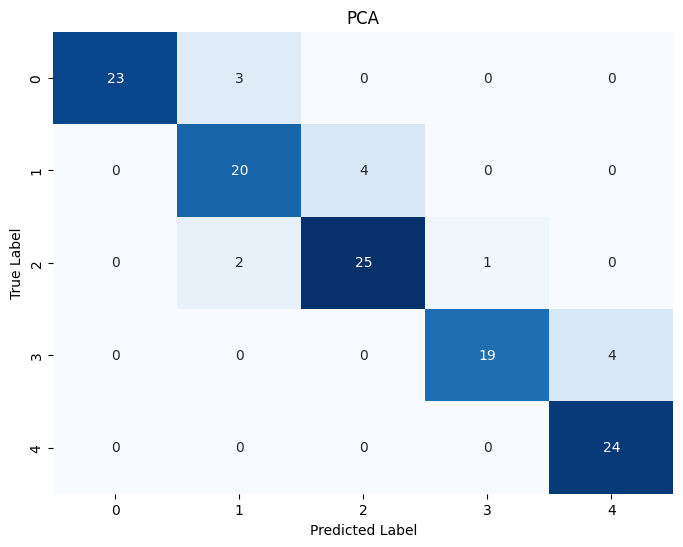

In [62]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA  # Import PCA for dimensionality reduction
from sklearn.preprocessing import StandardScaler  # To scale the data
from sklearn.model_selection import train_test_split  # To split the data into train and test sets
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.metrics import accuracy_score, confusion_matrix  # To evaluate the model and create confusion matrix
import seaborn as sns  # For visualization
import matplotlib.pyplot as plt  # For plotting

# Assuming df is your data frame
scaler = StandardScaler()

# Scale the data
dfs_scaled = scaler.fit_transform(df1)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(dfs_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print("\nPrincipal Components:")
print(principal_df)

# Create a target variable for classification (example)
num_samples = principal_df.shape[0]  # Get the number of samples
Y = np.random.choice([0, 1, 2, 3, 4], size=num_samples)  # Random multi-class target for illustration

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principal_df, Y_adjusted, test_size=0.5, random_state=42)

# Choose a machine learning model (e.g., Logistic Regression)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print("Accuracy:", accuracy_score(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.title("PCA")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
save_path = r"C:\Users\Gurukumar\Documents\Projects\ML\Random_forest\PCA regression.png"  # Specify your path and filename
plt.savefig(save_path)
plt.show()



Principal Components:
          PC1       PC2
0   -3.074942 -2.363612
1   -3.064708 -1.892847
2   -3.063982 -1.804987
3   -3.047699 -1.335884
4   -3.042711 -1.132636
..        ...       ...
245  4.336078 -0.701123
246  4.443396 -0.311524
247  4.713879  0.303405
248  4.992319  0.648217
249  4.334347 -0.167213

[250 rows x 2 columns]

Classification Report:
Accuracy: 0.888

Confusion Matrix:
[[23  3  0  0  0]
 [ 0 20  4  0  0]
 [ 0  2 25  1  0]
 [ 0  0  0 19  4]
 [ 0  0  0  0 24]]


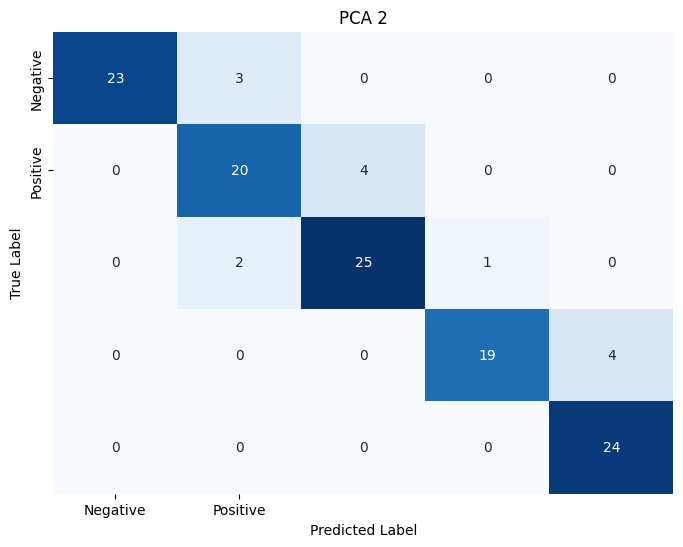

In [63]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA  # Import PCA for dimensionality reduction
from sklearn.preprocessing import StandardScaler  # To scale the data
from sklearn.model_selection import train_test_split  # To split the data into train and test sets
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.metrics import accuracy_score, confusion_matrix  # To evaluate the model and calculate confusion matrix
import seaborn as sns  # For plotting
import matplotlib.pyplot as plt  # For plotting

# Assuming df is your data frame
# Here is an example DataFrame, replace with your actual data.
# df = pd.DataFrame(np.random.rand(100, 10))  # Replace with your data frame

scaler = StandardScaler()

# Scale the data
dfs_scaled = scaler.fit_transform(df1)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(dfs_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print("\nPrincipal Components:")
print(principal_df)

# Create a target variable for classification (example)
  # Random binary target for illustration

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principal_df, Y_adjusted, test_size=0.5, random_state=42)

# Choose a machine learning model (e.g., Logistic Regression)
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print("Accuracy:", accuracy_score(y_test, y_pred))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("PCA 2")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Ensemble Accuracy (Grid Search): 0.944
Cross-Validation Mean Accuracy (Grid Search): 0.96


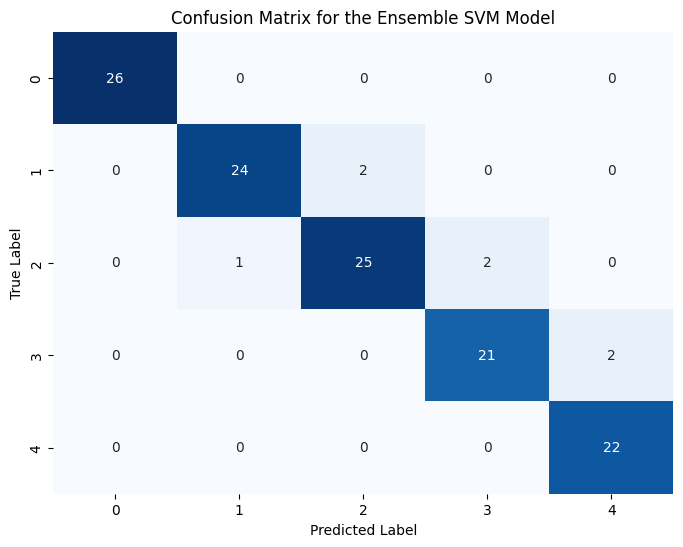

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.96      0.92      0.94        26
           2       0.93      0.89      0.91        28
           3       0.91      0.91      0.91        23
           4       0.92      1.00      0.96        22

    accuracy                           0.94       125
   macro avg       0.94      0.95      0.94       125
weighted avg       0.94      0.94      0.94       125



In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
Y=np.array([0,1,2,3,4])
Y_adjusted = np.repeat(Y, len(dfs) // len(Y) + 1)[:len(dfs)]
X_train, X_test, y_train, y_test = train_test_split(dfs, Y_adjusted, test_size=0.5, random_state=42)
# Define the parameter grid for each SVM classifier
param_grid_linear = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear']
}

param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

param_grid_poly = {
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3, 4],
    'kernel': ['poly']
}

# Perform Grid Search for each SVM classifier
grid_search_linear = GridSearchCV(SVC(), param_grid_linear, cv=5, n_jobs=-1, verbose=2)
grid_search_rbf = GridSearchCV(SVC(), param_grid_rbf, cv=5, n_jobs=-1, verbose=2)
grid_search_poly = GridSearchCV(SVC(), param_grid_poly, cv=5, n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search_linear.fit(X_train, y_train)
grid_search_rbf.fit(X_train, y_train)
grid_search_poly.fit(X_train, y_train)

# Get the best models
best_svm1 = grid_search_linear.best_estimator_
best_svm2 = grid_search_rbf.best_estimator_
best_svm3 = grid_search_poly.best_estimator_

# Train and make predictions using the best models
best_svm1.fit(X_train, y_train)
best_svm2.fit(X_train, y_train)
best_svm3.fit(X_train, y_train)

pred1 = best_svm1.predict(X_test)
pred2 = best_svm2.predict(X_test)
pred3 = best_svm3.predict(X_test)

ensemble_pred = (pred1 + pred2 + pred3) // 3
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Ensemble Accuracy (Grid Search):", ensemble_accuracy)

cv_scores = cross_val_score(best_svm1, X_train, y_train, cv=5)
print("Cross-Validation Mean Accuracy (Grid Search):", np.mean(cv_scores))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


# Calculate the ensemble confusion matrix
conf_matrix_ensemble = confusion_matrix(y_test, ensemble_pred)
report = classification_report(y_test, ensemble_pred)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ensemble, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for the Ensemble SVM Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
save_path = r"C:\Users\Gurukumar\Documents\Projects\ML\Random_forest\SVM ensemble.png"  # Specify your path and filename
plt.savefig(save_path)
plt.show()
print(report)

In [65]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Assuming dfs_df is the features dataframe and Y_adjusted is the target labels
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(dfs, Y_adjusted, test_size=0.3, random_state=42)

# Define the SVM model
svm_model = SVC()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],              # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernel functions
    'gamma': ['scale', 'auto']            # Kernel coefficient
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Use the best estimator to predict on the test data
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Best Hyperparameters:", grid_search.best_params_)
print("Classification Report:\n", report)


Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        17
           3       1.00      0.89      0.94        19
           4       0.88      1.00      0.94        15

    accuracy                           0.97        75
   macro avg       0.98      0.98      0.98        75
weighted avg       0.98      0.97      0.97        75



Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Ensemble Accuracy (Grid Search): 0.944
Cross-Validation Mean Accuracy (Grid Search): 0.96


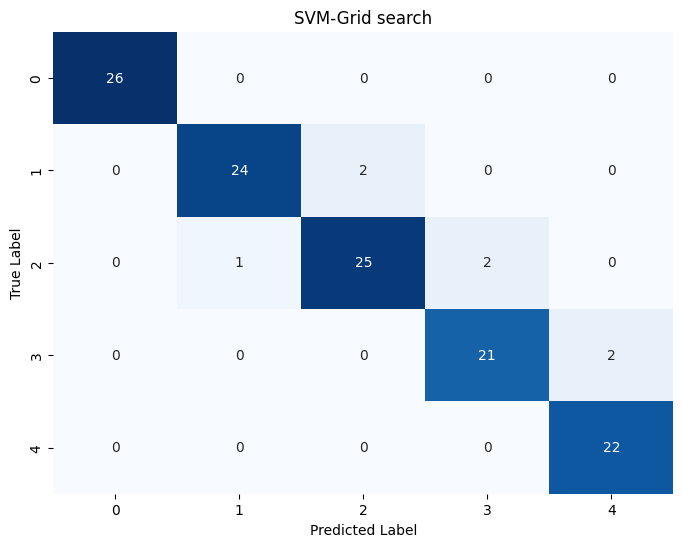

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.96      0.92      0.94        26
           2       0.93      0.89      0.91        28
           3       0.91      0.91      0.91        23
           4       0.92      1.00      0.96        22

    accuracy                           0.94       125
   macro avg       0.94      0.95      0.94       125
weighted avg       0.94      0.94      0.94       125



In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
# Assuming dfs is your dataset (2D array or DataFrame)
# Generate target labels (Y) based on the length of your dataset (dfs)
Y = np.array([0, 1, 2, 3, 4])
Y_adjusted3 = np.repeat(Y, len(dfs) // len(Y) + 1)[:len(dfs)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dfs, Y_adjusted3, test_size=0.5, random_state=42)

# Define the parameter grid for each SVM classifier
param_grid_linear = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear']
}

param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

param_grid_poly = {
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3, 4],
    'kernel': ['poly']
}

# Perform Grid Search for each SVM classifier
grid_search_linear = GridSearchCV(SVC(), param_grid_linear, cv=5, n_jobs=-1, verbose=2)
grid_search_rbf = GridSearchCV(SVC(), param_grid_rbf, cv=5, n_jobs=-1, verbose=2)
grid_search_poly = GridSearchCV(SVC(), param_grid_poly, cv=5, n_jobs=-1, verbose=2)

# Fit Grid Search on the training data
grid_search_linear.fit(X_train, y_train)
grid_search_rbf.fit(X_train, y_train)
grid_search_poly.fit(X_train, y_train)

# Get the best models
best_svm1 = grid_search_linear.best_estimator_
best_svm2 = grid_search_rbf.best_estimator_
best_svm3 = grid_search_poly.best_estimator_

# Make predictions using the best models on the test set
pred1 = best_svm1.predict(X_test)
pred2 = best_svm2.predict(X_test)
pred3 = best_svm3.predict(X_test)

# Ensemble predictions by averaging the predicted classes
# Ensure predictions are in the same range for averaging
ensemble_pred = (pred1 + pred2 + pred3) // 3

# Calculate the ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Ensemble Accuracy (Grid Search):", ensemble_accuracy)

# Perform cross-validation on the best SVM model
cv_scores = cross_val_score(best_svm1, X_train, y_train, cv=5)
print("Cross-Validation Mean Accuracy (Grid Search):", np.mean(cv_scores))

# Calculate the ensemble confusion matrix
conf_matrix_ensemble = confusion_matrix(y_test, ensemble_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ensemble, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("SVM-Grid search")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Save the confusion matrix plot
save_path = r"C:\Users\Gurukumar\Documents\Projects\ML\Random_forest\SVM grid search"  # Specify your path and filename
plt.savefig(save_path)
plt.show()
report = classification_report(y_test, ensemble_pred)
print(report)

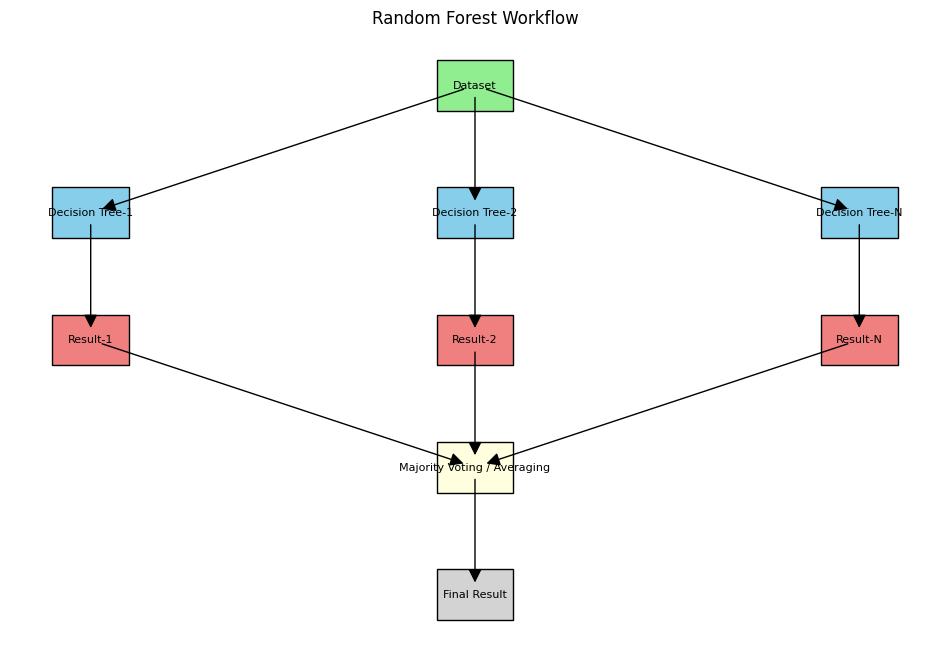

Graph saved as C:\Users\Gurukumar\Desktop\random_forest.png


In [67]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def visualize_random_forest_workflow(save_path=r'C:\Users\Gurukumar\Desktop\random_forest.png'):
    G = nx.DiGraph()

    # Define nodes with detailed descriptions
    nodes = {
        'Dataset': 'Dataset',
        'Tree1': 'Decision Tree-1',
        'Tree2': 'Decision Tree-2',
        'TreeN': 'Decision Tree-N',
        'Result1': 'Result-1',
        'Result2': 'Result-2',
        'ResultN': 'Result-N',
        'Voting': 'Majority Voting / Averaging',
        'FinalResult': 'Final Result'
    }

    # Define edges
    edges = [
        ('Dataset', 'Tree1'),
        ('Dataset', 'Tree2'),
        ('Dataset', 'TreeN'),
        ('Tree1', 'Result1'),
        ('Tree2', 'Result2'),
        ('TreeN', 'ResultN'),
        ('Result1', 'Voting'),
        ('Result2', 'Voting'),
        ('ResultN', 'Voting'),
        ('Voting', 'FinalResult')
    ]

    # Add nodes and edges to the graph
    for node, desc in nodes.items():
        G.add_node(node, label=desc)
    for src, dst in edges:
        G.add_edge(src, dst)

    # Manually set the positions
    pos = {
        'Dataset': (0, 2),
        'Tree1': (-2, 1),
        'Tree2': (0, 1),
        'TreeN': (2, 1),
        'Result1': (-2, 0),
        'Result2': (0, 0),
        'ResultN': (2, 0),
        'Voting': (0, -1),
        'FinalResult': (0, -2)
    }

    # Define colors for each level
    colors = {
        'Dataset': 'lightgreen',
        'Tree1': 'skyblue',
        'Tree2': 'skyblue',
        'TreeN': 'skyblue',
        'Result1': 'lightcoral',
        'Result2': 'lightcoral',
        'ResultN': 'lightcoral',
        'Voting': 'lightyellow',
        'FinalResult': 'lightgrey'
    }

    # Increase figure size
    plt.figure(figsize=(12, 8))  # Width, Height in inches

    # Draw the nodes as squares using patches
    ax = plt.gca()
    for node, (x, y) in pos.items():
        color = colors[node]
        square = Rectangle((x - 0.2, y - 0.2), 0.4, 0.4, color=color, ec='black')
        ax.add_patch(square)

    # Draw the edges
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, ax=ax)

    # Draw the labels
    nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_size=8, font_color='black', font_family='sans-serif', ax=ax)

    # Display the graph
    plt.title("Random Forest Workflow")
    plt.axis('off')
    
    # Save the figure
    plt.savefig(save_path, format='png')

    # Show the graph
    plt.show()

    print(f"Graph saved as {save_path}")

# Call the function to visualize and save the graph
visualize_random_forest_workflow()


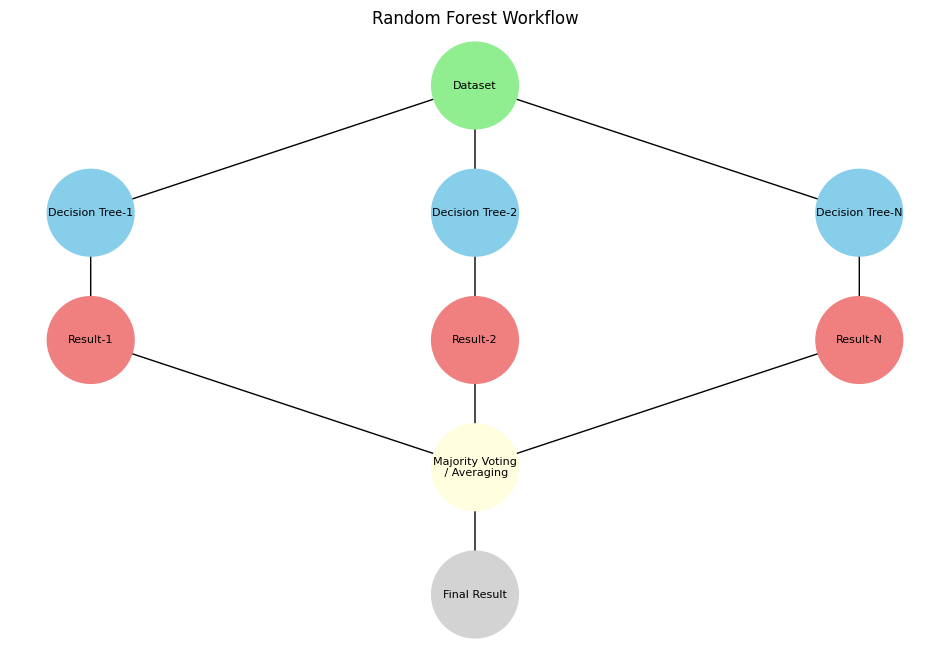

Graph saved as C:\Users\Gurukumar\Desktop\random_forest.png


In [68]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_random_forest_workflow(save_path=r'C:\Users\Gurukumar\Desktop\random_forest.png'):
    G = nx.DiGraph()

    # Define nodes with detailed descriptions
    nodes = {
        'Dataset': 'Dataset',
        'Tree1': 'Decision Tree-1',
        'Tree2': 'Decision Tree-2',
        'TreeN': 'Decision Tree-N',
        'Result1': 'Result-1',
        'Result2': 'Result-2',
        'ResultN': 'Result-N',
        'Voting': 'Majority Voting\n / Averaging',
        'FinalResult': 'Final Result'
    }

    # Define edges
    edges = [
        ('Dataset', 'Tree1'),
        ('Dataset', 'Tree2'),
        ('Dataset', 'TreeN'),
        ('Tree1', 'Result1'),
        ('Tree2', 'Result2'),
        ('TreeN', 'ResultN'),
        ('Result1', 'Voting'),
        ('Result2', 'Voting'),
        ('ResultN', 'Voting'),
        ('Voting', 'FinalResult')
    ]

    # Add nodes and edges to the graph
    for node, desc in nodes.items():
        G.add_node(node, label=desc)
    for src, dst in edges:
        G.add_edge(src, dst)

    # Manually set the positions
    pos = {
        'Dataset': (0, 2),
        'Tree1': (-2, 1),
        'Tree2': (0, 1),
        'TreeN': (2, 1),
        'Result1': (-2, 0),
        'Result2': (0, 0),
        'ResultN': (2, 0),
        'Voting': (0, -1),
        'FinalResult': (0, -2)
    }

    # Define colors for each level
    colors = {
        'Dataset': 'lightgreen',
        'Tree1': 'skyblue',
        'Tree2': 'skyblue',
        'TreeN': 'skyblue',
        'Result1': 'lightcoral',
        'Result2': 'lightcoral',
        'ResultN': 'lightcoral',
        'Voting': 'lightyellow',
        'FinalResult': 'lightgrey'
    }

    # Get node colors based on the level
    node_colors = [colors[node] for node in G.nodes]

    # Increase figure size
    plt.figure(figsize=(12, 8))  # Width, Height in inches

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=3900, node_color=node_colors)

    # Draw the edges
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20)

    # Draw the labels
    nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_size=8, font_color='black', font_family='sans-serif')

    # Display the graph
    plt.title("Random Forest Workflow")
    plt.axis('off')
    
    # Save the figure
    plt.savefig(save_path, format='png')

    # Show the graph
    plt.show()

    print(f"Graph saved as {save_path}")

# Call the function to visualize and save the graph
visualize_random_forest_workflow()


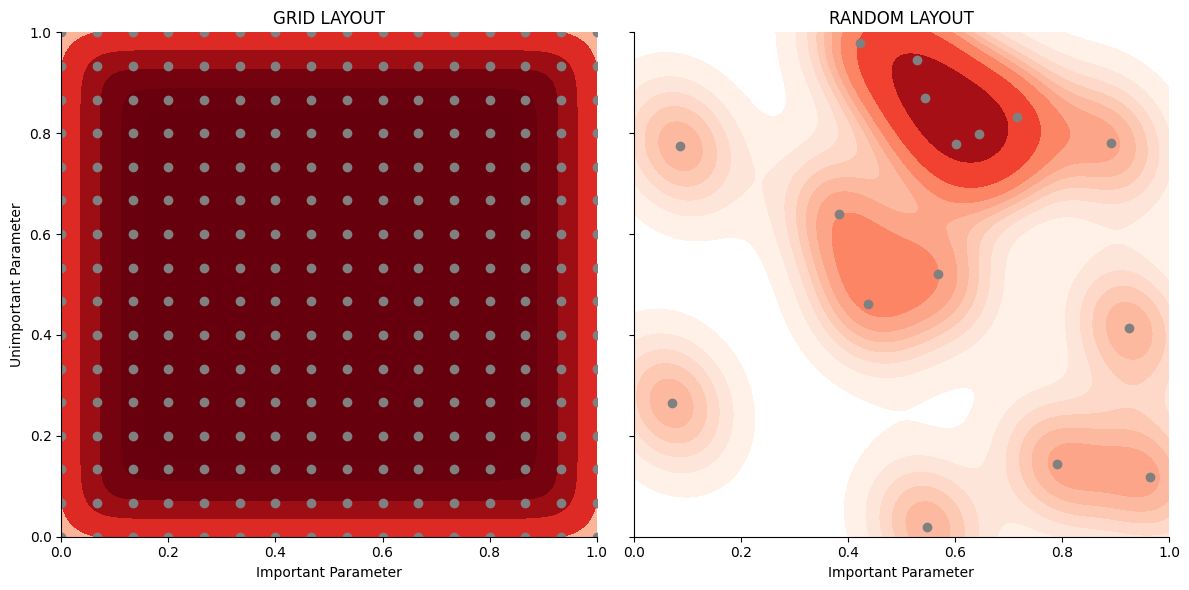

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate data
np.random.seed(0)
important_param = np.linspace(0, 1, 16)
unimportant_param = np.linspace(0, 1, 16)

# Create grid layout data
grid_x, grid_y = np.meshgrid(important_param, unimportant_param)
grid_x = grid_x.flatten()
grid_y = grid_y.flatten()

# Create random layout data
random_x = np.random.rand(16)
random_y = np.random.rand(16)

# Set up the figure and axis
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot grid layout
sns.kdeplot(x=grid_x, y=grid_y, ax=axes[0], cmap="Reds", shade=True, bw_adjust=0.5)
axes[0].scatter(grid_x, grid_y, color='gray')
axes[0].set_title("GRID LAYOUT")
axes[0].set_xlabel("Important Parameter")
axes[0].set_ylabel("Unimportant Parameter")

# Plot random layout
sns.kdeplot(x=random_x, y=random_y, ax=axes[1], cmap="Reds", shade=True, bw_adjust=0.5)
axes[1].scatter(random_x, random_y, color='gray')
axes[1].set_title("RANDOM LAYOUT")
axes[1].set_xlabel("Important Parameter")
axes[1].set_ylabel("")

# Add additional styling to match the provided image
for ax in axes:
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [70]:
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_pred and Y_adjusted are your input and output arrays respectively
y_pred = np.abs(y_pred)  # Ensure y_pred is non-negative if necessary

# Check the shapes of y_pred and Y_adjusted
print(f"Shape of y_pred: {y_pred.shape}")
print(f"Shape of Y_adjusted: {Y_adjusted.shape}")

# Ensure y_pred and Y_adjusted have the same length
min_length = min(len(y_pred), len(Y_adjusted))
y_pred = y_pred[:min_length]
Y_adjusted = Y_adjusted[:min_length]

# Reshape the data if necessary (SVR expects 2D input)
y_pred = y_pred.reshape(-1, 1)

# Standardize the data
scaler = StandardScaler()
y_pred_scaled = scaler.fit_transform(y_pred)

# Define the SVM model
svm_model = SVR(kernel='rbf')  # You can choose different kernels like 'linear', 'poly', etc.

# Fit the SVM model
svm_model.fit(y_pred_scaled, Y_adjusted)

# Make predictions
y_pred_svm = svm_model.predict(y_pred_scaled)

# Assuming Y_adjusted contains binary labels for classification metrics
y_true_binary = (Y_adjusted > 0).astype(int)  # Convert to binary labels based on a threshold
y_pred_binary = (y_pred_svm > 0).astype(int)

# Compute custom metrics
precision = precision_score(y_true_binary, y_pred_binary)
recall = recall_score(y_true_binary, y_pred_binary)
f1 = f1_score(y_true_binary, y_pred_binary)
accuracy = accuracy_score(y_true_binary, y_pred_binary)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')


Shape of y_pred: (75,)
Shape of Y_adjusted: (250,)
Precision: 0.32
Recall: 1.0
F1 Score: 0.48484848484848486
Accuracy: 0.32


In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import classification_report
# Load the statistical features into a DataFrame
df = pd.DataFrame(dfs)

# Assuming 'target_column' is the target variable in your dataset
Y = np.array([0, 1, 2, 3, 4])
y = np.repeat(Y, len(df) // len(Y) + 1)[:len(df)]  # Target variable

# Assuming 'min' is a column to be dropped
X = df.drop('min', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose an SVM model (e.g., SVR for regression)
svm_model = SVR(kernel='rbf')

# Train the SVM model on the training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2) Score:", r2)

# For calculating accuracy, we need to convert the regression output to classification
# Assuming y_test and y_pred are in the same range and can be converted to integer classes

# Convert predictions to the nearest integer class
y_pred_class = np.round(y_pred).astype(int)
y_test_class = y_test.astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print("Accuracy:", accuracy)
report=classification_report(y_test_class,y_pred_class)
print(report)

Mean Squared Error: 0.027958468835219415
R-squared (R^2) Score: 0.9859193851555099
Accuracy: 0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      0.85      0.92        13
           4       0.78      1.00      0.88         7

    accuracy                           0.96        50
   macro avg       0.96      0.97      0.96        50
weighted avg       0.97      0.96      0.96        50



In [72]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the statistical features into a DataFrame
df = pd.DataFrame(dfs)

# Standardize the features
scaler = StandardScaler()
dfs_scaled = scaler.fit_transform(df)

# Perform PCA retaining 95% of the variance
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(dfs_scaled)
principal_df = pd.DataFrame(data=principal_components)

print("\nPrincipal Components:")
print(principal_df)

# Create a target variable for classification (example)
  # Random binary target for illustration

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principal_df, y, test_size=0.5, random_state=42)

# Choose a machine learning model (e.g., Logistic Regression)
model = LogisticRegression()





Principal Components:
            0         1         2
0   -3.074942 -2.363612  1.861665
1   -3.064708 -1.892847  1.553299
2   -3.063982 -1.804987  1.490712
3   -3.047699 -1.335884  1.208436
4   -3.042711 -1.132636  1.083004
..        ...       ...       ...
245  4.336078 -0.701123 -0.978898
246  4.443396 -0.311524 -1.123279
247  4.713879  0.303405 -1.145207
248  4.992319  0.648217 -1.013429
249  4.334347 -0.167213 -1.640368

[250 rows x 3 columns]


In [73]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
Y=np.array([0,1,2,3,4])
Y_adjusted4 = np.repeat(Y, len(df) // len(Y) + 1)[:len(df)]
# Load the statistical features into a DataFrame
df = pd.DataFrame(dfs)

# Standardize the features
scaler = StandardScaler()
dfs_scaled = scaler.fit_transform(df)

# Perform PCA retaining 95% of the variance
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(dfs_scaled)
principal_df = pd.DataFrame(data=principal_components)

print("\nPrincipal Components:")
print(principal_df)

# Create a target variable for classification (example)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principal_df, Y_adjusted4, test_size=0.5, random_state=42)

# Choose a machine learning model (e.g., Logistic Regression)
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



Principal Components:
            0         1         2
0   -3.074942 -2.363612  1.861665
1   -3.064708 -1.892847  1.553299
2   -3.063982 -1.804987  1.490712
3   -3.047699 -1.335884  1.208436
4   -3.042711 -1.132636  1.083004
..        ...       ...       ...
245  4.336078 -0.701123 -0.978898
246  4.443396 -0.311524 -1.123279
247  4.713879  0.303405 -1.145207
248  4.992319  0.648217 -1.013429
249  4.334347 -0.167213 -1.640368

[250 rows x 3 columns]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      0.92      0.96        26
           2       0.93      0.89      0.91        28
           3       0.88      0.91      0.89        23
           4       0.92      1.00      0.96        22

    accuracy                           0.94       125
   macro avg       0.94      0.95      0.94       125
weighted avg       0.95      0.94      0.94       125

Accuracy: 0.944



Principal Components:
          0         1         2
0 -3.074942 -2.363612  1.861665
1 -3.064708 -1.892847  1.553299
2 -3.063982 -1.804987  1.490712
3 -3.047699 -1.335884  1.208436
4 -3.042711 -1.132636  1.083004

Training Set Class Distribution:
3    28
1    25
0    25
4    24
2    23
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      0.92      0.96        26
           2       0.93      0.93      0.93        28
           3       0.91      0.91      0.91        23
           4       0.92      1.00      0.96        22

    accuracy                           0.95       125
   macro avg       0.95      0.95      0.95       125
weighted avg       0.95      0.95      0.95       125

Accuracy: 0.952
Best Hyperparameters: {'C': 10, 'max_iter': 300, 'penalty': 'l1', 'solver': 'saga'}


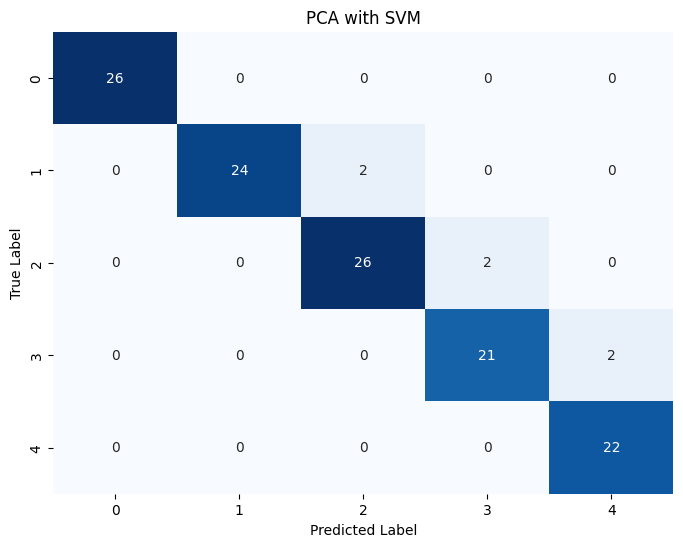

In [74]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the statistical features into a DataFrame
df = pd.DataFrame(dfs)  # Assuming 'dfs' is a dictionary containing your statistical feature data

# Standardize the features
scaler = StandardScaler()
dfs_scaled = scaler.fit_transform(df)

# Perform PCA retaining 95% of the variance
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(dfs_scaled)
principal_df = pd.DataFrame(data=principal_components)

print("\nPrincipal Components:")
print(principal_df.head())

# Create a target variable with 5 classes (0, 1, 2, 3, 4) for multi-class classification
Y = np.array([0, 1, 2, 3, 4])
Y_adjusted = np.repeat(Y, len(df) // len(Y) + 1)[:len(df)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principal_df, Y_adjusted, test_size=0.5, random_state=42)

# Check the distribution in the training set to ensure no data leakage or imbalance
print("\nTraining Set Class Distribution:")
print(pd.Series(y_train).value_counts())

# Define a logistic regression model for multi-class classification
model = LogisticRegression(multi_class='multinomial', max_iter=300, solver='saga')

# Define hyperparameters grid for tuning
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['saga'],  # Using 'saga' solver as it supports multi-class with l1, l2 penalties
    'max_iter': [300]  # Setting max_iter to a high value to ensure convergence
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Confusion matrix to see where predictions are failing
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(Y_adjusted), yticklabels=np.unique(Y_adjusted))
plt.title("PCA with SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
save_path = r"C:\Users\Gurukumar\Documents\Projects\ML\Random_forest\PCA grid search.png"  # Specify your path and filename
plt.savefig(save_path)
plt.show()


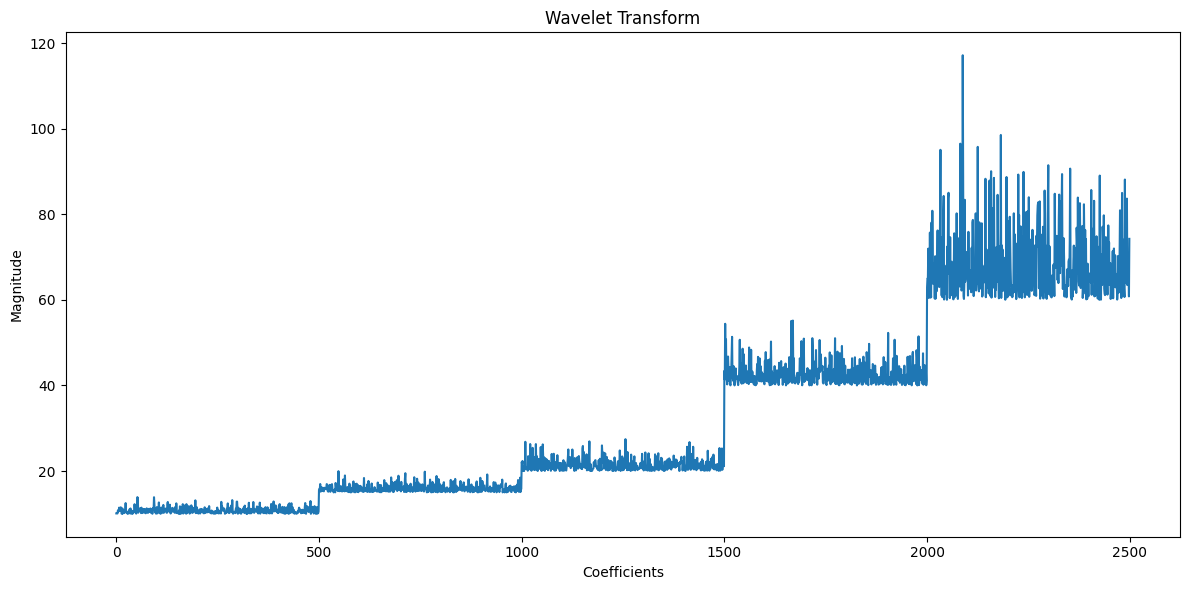

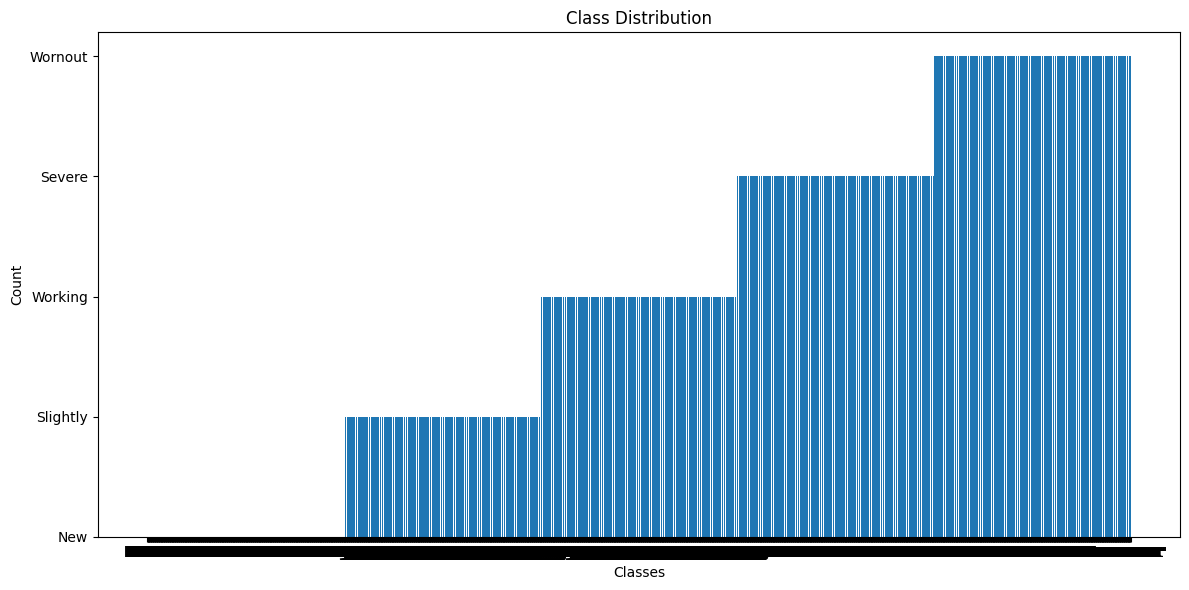

In [75]:
import numpy as np
import h5py
import pywt
import matplotlib.pyplot as plt

def flat_wavelet_transform2(data, method):
    """For a 1D or 2D image data, take the wavelet transform"""
    if data.ndim == 1:
        data = data.reshape(1, -1)  # Reshape 1D data to 2D
    coeffs = pywt.wavedec2(data, method)
    output = coeffs[0].reshape(-1)
    for tups in coeffs[1:]:
        for c in tups:
            output = np.concatenate((output, c.reshape(-1)))
    return output

def plot_wavelet_transform(transformed_data, classes):
    plt.figure(figsize=(12, 6))
    plt.plot(transformed_data)
    plt.title('Wavelet Transform')
    plt.xlabel('Coefficients')
    plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    indices = np.arange(len(classes))
    plt.bar(indices, classes)
    plt.xticks(indices, classes)
    plt.title('Class Distribution')
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Load data from the HDF5 file
file_path = r"C:\Users\Gurukumar\Desktop\Accepted_dataset.h5"
with h5py.File(file_path, 'r') as file:
    data = file['InputFeatures']['SoundPressure'][:]   
    classes = file['TargetLabels']['target'][:] 

# Define wavelet transform methods
methods = ['haar', 'coif1', 'coif2', 'coif3', 'bior1.1', 'bior1.3', 'bior3.1', 'bior3.3', 'rbio1.1', 'rbio1.3', 'rbio3.1', 'rbio3.3']
transformed_data = flat_wavelet_transform2(data, methods[0])

# Plot the wavelet transform and class distribution
plot_wavelet_transform(transformed_data, classes)


In [76]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define custom accuracy metric for regression
def custom_accuracy(y_true, y_pred, threshold=0.9):
    # Calculate absolute difference between true and predicted values
    diff = np.abs(y_true - y_pred)
    
    # Check if the absolute difference is within the threshold
    correct = np.less_equal(diff, threshold)
    
    # Calculate accuracy as the mean of correct predictions
    return np.mean(correct)

# Assuming X_train, y_pred, and Y_adjusted are already defined

# Define and train the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model (you should use the actual features and targets)
rf_model.fit(X_train, y_train)  # X_train should be your features, y_train should be your targets

# Make predictions
y_pred_rf = rf_model.predict(X_train)  # Replace X_train with your test data if needed

# Calculate loss (mean squared error)
mse = mean_squared_error(y_train, y_pred_rf)  # Again, use test data if evaluating on test set
print(f"Mean Squared Error: {mse}")

# Calculate custom accuracy
accuracy = custom_accuracy(y_train, y_pred_rf)  # Replace y_train with your test targets if needed
print(f"Custom Accuracy: {accuracy}")

# Note: Replace 'X_train' and 'y_train' with your actual feature matrix and target variable.



Mean Squared Error: 0.008575200000000002
Custom Accuracy: 1.0


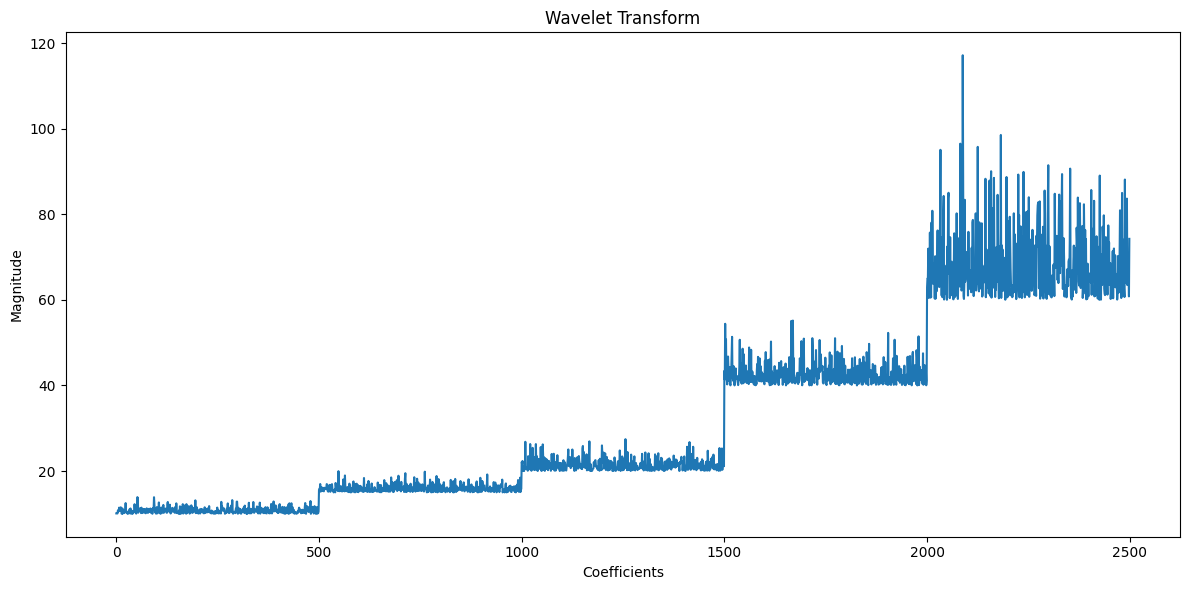

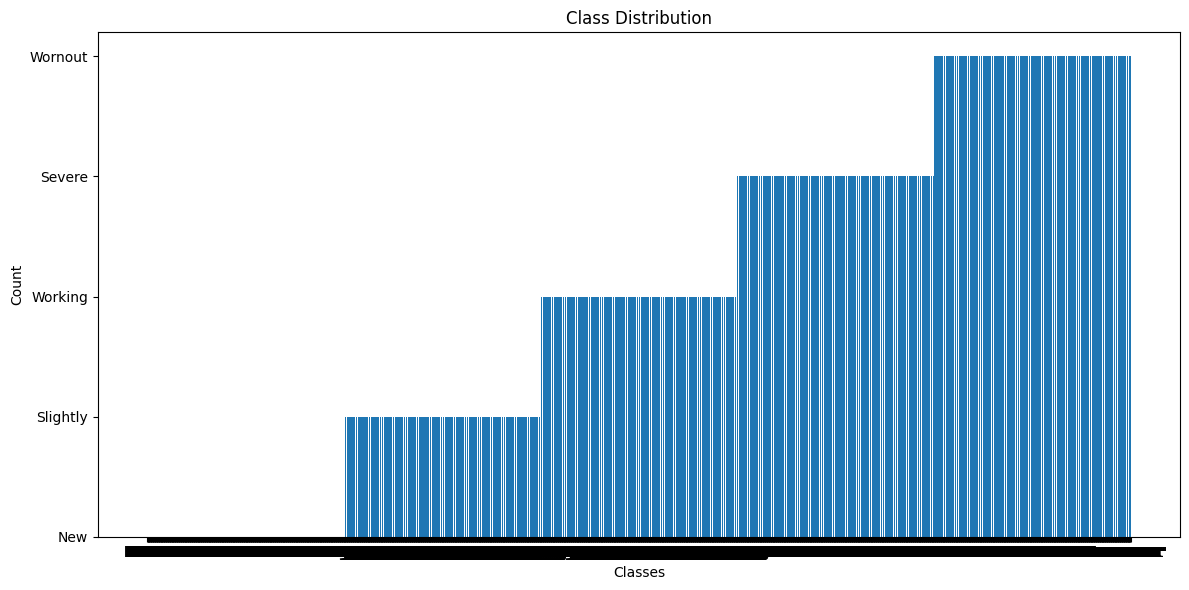


Transformed Wavelet DataFrame:
   Coefficient_1  Coefficient_2  Coefficient_3  Coefficient_4  Coefficient_5  \
0      10.095508      10.097378       10.19014      10.093637      10.802822   

   Coefficient_6  Coefficient_7  Coefficient_8  Coefficient_9  Coefficient_10  \
0      10.505458      10.744097      11.449167      11.093827       10.883989   

   ...  Coefficient_2491  Coefficient_2492  Coefficient_2493  \
0  ...         66.590513         67.912379         76.273725   

   Coefficient_2494  Coefficient_2495  Coefficient_2496  Coefficient_2497  \
0         83.657324         63.453418         67.981951          66.71058   

   Coefficient_2498  Coefficient_2499  Coefficient_2500  
0         68.681036         60.809686         74.254644  

[1 rows x 2500 columns]


In [77]:
import numpy as np
import h5py
import pywt
import matplotlib.pyplot as plt
import pandas as pd  # Importing pandas for DataFrame creation

def flat_wavelet_transform2(data, method):
    """For a 1D or 2D image data, take the wavelet transform"""
    if data.ndim == 1:
        data = data.reshape(1, -1)  # Reshape 1D data to 2D
    coeffs = pywt.wavedec2(data, method)
    output = coeffs[0].reshape(-1)
    for tups in coeffs[1:]:
        for c in tups:
            output = np.concatenate((output, c.reshape(-1)))
    return output

def plot_wavelet_transform(transformed_data, classes):
    plt.figure(figsize=(12, 6))
    plt.plot(transformed_data)
    plt.title('Wavelet Transform')
    plt.xlabel('Coefficients')
    plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    indices = np.arange(len(classes))
    plt.bar(indices, classes)
    plt.xticks(indices, classes)
    plt.title('Class Distribution')
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Load data from the HDF5 file
file_path = r"C:\Users\Gurukumar\Desktop\Accepted_dataset.h5"
with h5py.File(file_path, 'r') as file:
    data = file['InputFeatures']['SoundPressure'][:]   
    classes = file['TargetLabels']['target'][:] 

# Define wavelet transform methods
methods = ['haar', 'coif1', 'coif2', 'coif3', 'bior1.1', 'bior1.3', 'bior3.1', 'bior3.3', 'rbio1.1', 'rbio1.3', 'rbio3.1', 'rbio3.3']
# Convert the wavelet transformed data into a DataFrame
transformed_data = flat_wavelet_transform2(data, methods[0])

# If transformed_data is 1D, convert it to 2D for DataFrame
transformed_data_reshaped = transformed_data.reshape(1, -1) if transformed_data.ndim == 1 else transformed_data

# Create the DataFrame with correct column names
transformed_df = pd.DataFrame(transformed_data_reshaped, columns=[f'Coefficient_{i+1}' for i in range(transformed_data_reshaped.shape[1])])

# Optionally, you can add the classes to the DataFrame if needed
# Ensure that the length of classes matches the number of rows in the DataFrame
if len(classes) == transformed_df.shape[0]:
    transformed_df['Class'] = classes  # Adding the class column

# Plot the wavelet transform and class distribution
plot_wavelet_transform(transformed_data, classes)

# Display the DataFrame
print("\nTransformed Wavelet DataFrame:")
print(transformed_df.head())


In [78]:
print(f"Original data shape: {data.shape}")


Original data shape: (2500,)


Transformed data shape: (2500, 1)
Accuracy: 1.0000
              precision    recall  f1-score   support

         New       1.00      1.00      1.00       150
      Severe       1.00      1.00      1.00       150
    Slightly       1.00      1.00      1.00       150
     Working       1.00      1.00      1.00       150
     Wornout       1.00      1.00      1.00       150

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



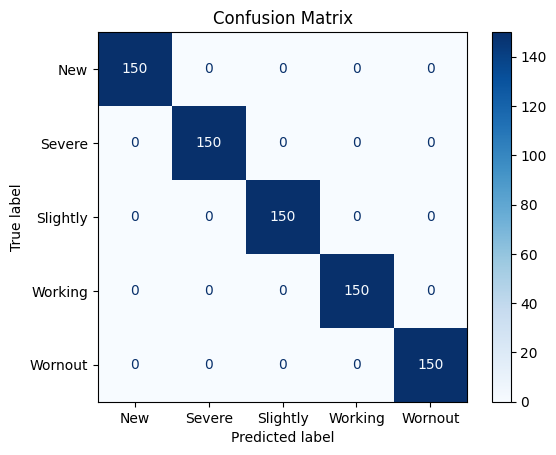

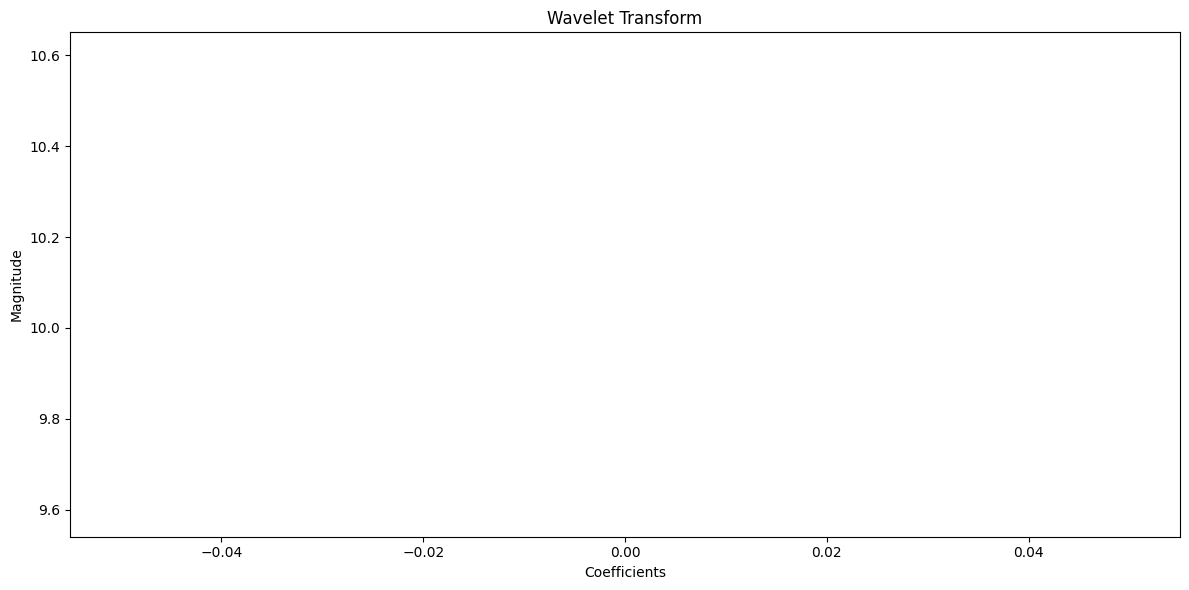

In [79]:
import numpy as np
import h5py
import pywt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

def flat_wavelet_transform1(data, method):
    """For 1D image data, take the wavelet transform"""
    if data.ndim == 1:
        data = data.reshape(1, -1)  # Reshape for single sample
    coeffs = pywt.wavedec(data.flatten(), method)  # Use wavedec for 1D
    output = np.concatenate(coeffs)  # Concatenate all coefficients
    return output

def plot_wavelet_transform(transformed_data, classes):
    plt.figure(figsize=(12, 6))
    plt.plot(transformed_data)
    plt.title('Wavelet Transform')
    plt.xlabel('Coefficients')
    plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.show()

# Load data from the HDF5 file
file_path = r"C:\Users\Gurukumar\Desktop\Accepted_dataset.h5"
with h5py.File(file_path, 'r') as file:
    data = file['InputFeatures']['SoundPressure'][:]   
    classes = file['TargetLabels']['target'][:] 

# Convert byte strings to normal strings if necessary
if isinstance(classes[0], bytes):
    classes = [c.decode('utf-8') for c in classes]

# Define wavelet transform methods
methods = ['haar', 'coif1', 'coif2', 'coif3', 'bior1.1', 'bior1.3', 'bior3.1', 'bior3.3', 'rbio1.1', 'rbio1.3', 'rbio3.1', 'rbio3.3']

# Apply the wavelet transform to each sample in the data
transformed_data = np.array([flat_wavelet_transform1(sample, methods[0]) for sample in data])

# Ensure transformed_data is 2D (samples x features)
print(f"Transformed data shape: {transformed_data.shape}")

# Encode the class labels to numeric values
label_encoder = LabelEncoder()
numeric_classes = label_encoder.fit_transform(classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(transformed_data, numeric_classes, test_size=0.3, random_state=42, stratify=numeric_classes)

# Initialize and train the random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Optionally, plot the wavelet transform for the first sample
plot_wavelet_transform(transformed_data[0], classes)



Principal Components:
            0         1         2
0   -3.074942 -2.363612  1.861665
1   -3.064708 -1.892847  1.553299
2   -3.063982 -1.804987  1.490712
3   -3.047699 -1.335884  1.208436
4   -3.042711 -1.132636  1.083004
..        ...       ...       ...
245  4.336078 -0.701123 -0.978898
246  4.443396 -0.311524 -1.123279
247  4.713879  0.303405 -1.145207
248  4.992319  0.648217 -1.013429
249  4.334347 -0.167213 -1.640368

[250 rows x 3 columns]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       258
           1       1.00      1.00      1.00       256
           2       1.00      0.99      1.00       240
           3       0.99      1.00      1.00       255
           4       1.00      1.00      1.00       241

    accuracy                           1.00      1250
   macro avg       1.00      1.00      1.00      1250
weighted avg       1.00      1.00      1.00      1250

Accuracy: 0.9984


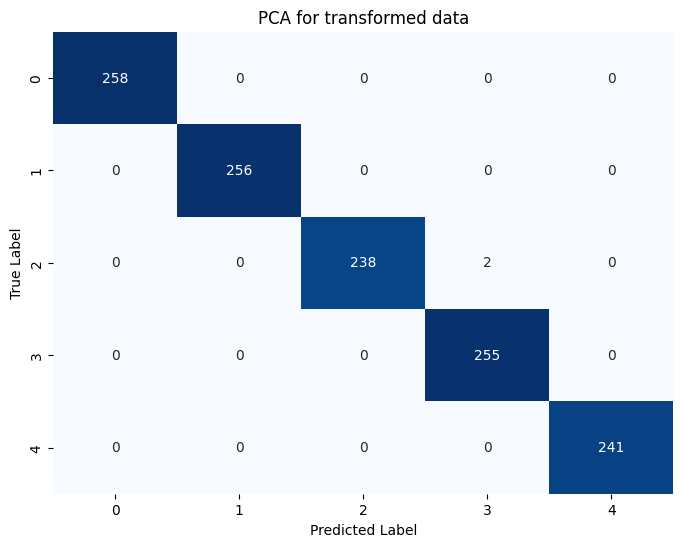

In [80]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the statistical features into a DataFrame
df = pd.DataFrame(dfs)

# Standardize the features
scaler = StandardScaler()
dfs_scaled = scaler.fit_transform(df)

# Perform PCA retaining 95% of the variance
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(dfs_scaled)
principal_df = pd.DataFrame(data=principal_components)

print("\nPrincipal Components:")
print(principal_df)

# Create a target variable for classification (example)
# In practice, replace this with your actual target variable
y = np.random.choice([0, 1, 2, 3, 4], size=(principal_df.shape[0],))  # Random target for illustration

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(transformed_data, numeric_classes, test_size=0.5, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("PCA for transformed data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Save the confusion matrix plot
save_path = r"C:\Users\Gurukumar\Documents\Projects\ML\Random_forest\PCA Transformed.png"  # Specify your path and filename
plt.savefig(save_path)
plt.show()



Principal Components:
            0         1         2
0   -3.074942 -2.363612  1.861665
1   -3.064708 -1.892847  1.553299
2   -3.063982 -1.804987  1.490712
3   -3.047699 -1.335884  1.208436
4   -3.042711 -1.132636  1.083004
..        ...       ...       ...
245  4.336078 -0.701123 -0.978898
246  4.443396 -0.311524 -1.123279
247  4.713879  0.303405 -1.145207
248  4.992319  0.648217 -1.013429
249  4.334347 -0.167213 -1.640368

[250 rows x 3 columns]

Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.37      0.33        19
           1       0.30      0.22      0.26        27
           2       0.10      0.16      0.12        19
           3       0.20      0.14      0.17        35
           4       0.19      0.20      0.20        25

    accuracy                           0.21       125
   macro avg       0.22      0.22      0.21       125
weighted avg       0.22      0.21      0.21       125

Accuracy: 0.208


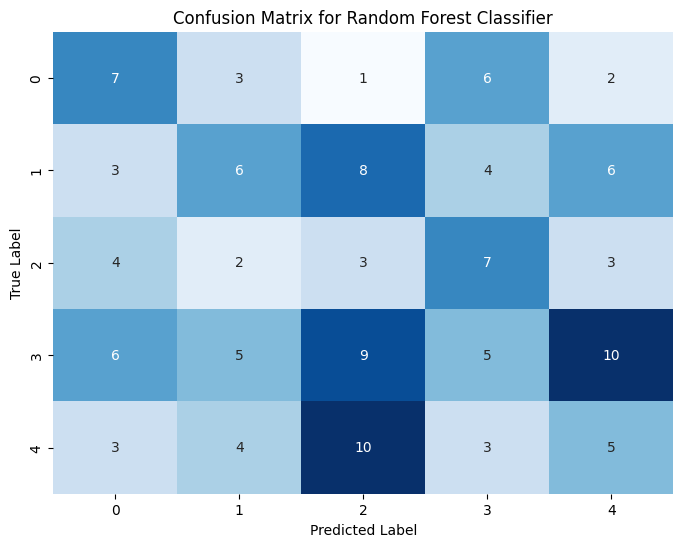

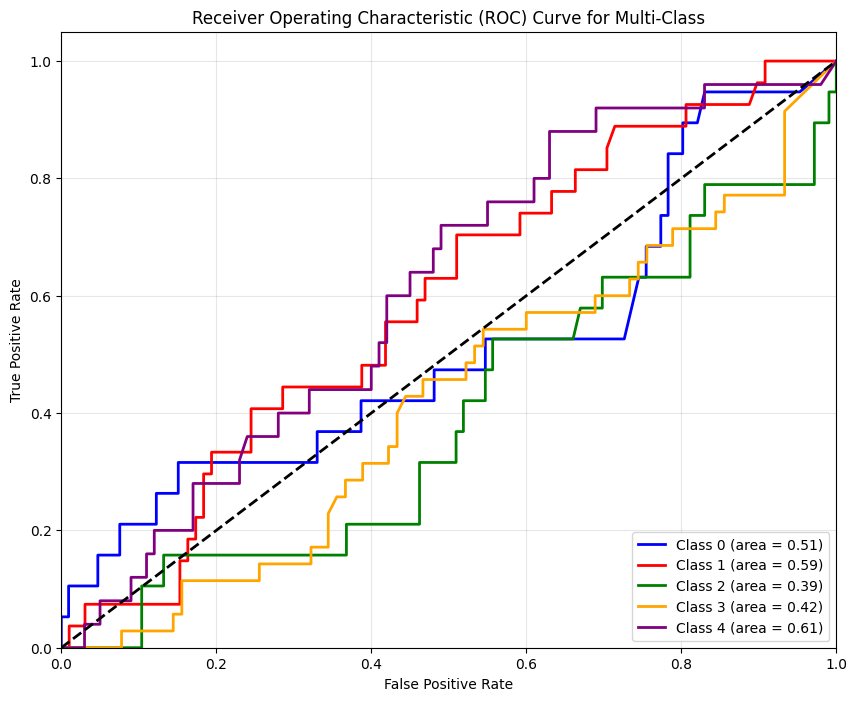

In [81]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the statistical features into a DataFrame
df = pd.DataFrame(dfs)

# Step 1: Standardize the features
scaler = StandardScaler()
dfs_scaled = scaler.fit_transform(df)

# Step 2: Perform PCA retaining 95% of the variance
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(dfs_scaled)
principal_df = pd.DataFrame(data=principal_components)

print("\nPrincipal Components:")
print(principal_df)

# Step 3: Create a target variable for classification (example)
# Replace this with your actual target variable in practice
y = np.random.choice([0, 1, 2, 3, 4], size=(principal_df.shape[0],))  # Random target for illustration

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principal_df, y, test_size=0.5, random_state=42)

# Step 5: Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Step 6: Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Step 7: Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Save the confusion matrix plot
save_path = r'C:\Users\Gurukumar\Desktop\confusion_matrix_transformpca.png'  # Specify your path and filename
plt.savefig(save_path)
plt.show()

# Step 8: Plot ROC Curve for multi-class classification
# Binarize the output labels for ROC curve plotting
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# Train the OneVsRestClassifier with the Random Forest model
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=0))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (area = {roc_auc[i]:.2f})')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)

# Save the ROC plot
roc_save_path = r'C:\Users\Gurukumar\Desktop\roc_curve_transformpca.png'  # Specify your path and filename
plt.savefig(roc_save_path)
plt.show()



Principal Components:
           0
0 -21.776834
1 -21.774963
2 -21.682201
3 -21.778704
4 -21.069519

Target Class Distribution:
0    500
2    500
3    500
1    500
4    500
Name: count, dtype: int64

Training Set Class Distribution:
2    260
4    259
3    245
1    244
0    242
Name: count, dtype: int64
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, tota

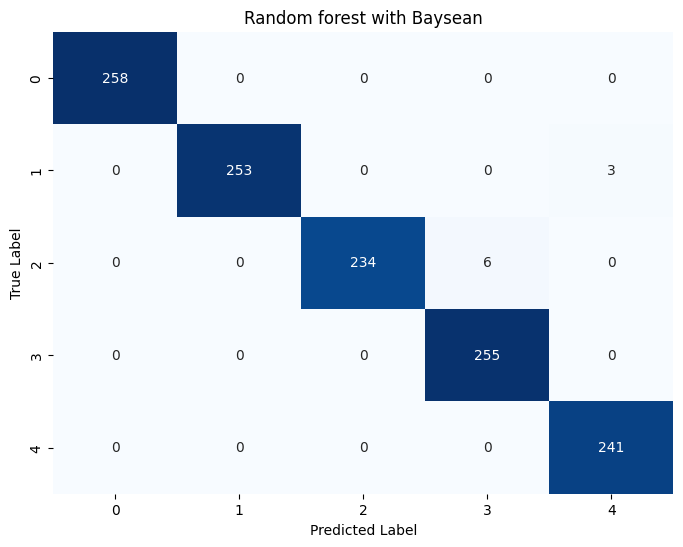

In [82]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from skopt import BayesSearchCV  # Import BayesSearchCV for Bayesian Optimization
import matplotlib.pyplot as plt
import seaborn as sns

# Load the statistical features into a DataFrame
df = pd.DataFrame(dfs)  # Assuming 'dfs' is a dictionary containing your statistical feature data

# Standardize the features
scaler = StandardScaler()
dfs_scaled = scaler.fit_transform(df)

# Perform PCA retaining 95% of the variance
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(transformed_data)
principal_df = pd.DataFrame(data=principal_components)

print("\nPrincipal Components:")
print(principal_df.head())

# Check the distribution of classes
print("\nTarget Class Distribution:")
print(pd.Series(numeric_classes).value_counts())  # Ensure 'numeric_classes' contains your class labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principal_df, numeric_classes, test_size=0.5, random_state=42)

# Check the distribution in the training set to ensure no data leakage or imbalance
print("\nTraining Set Class Distribution:")
print(pd.Series(y_train).value_counts())

# Define a logistic regression model for multi-class classification
model = LogisticRegression(multi_class='multinomial', max_iter=300, solver='saga')

# Define hyperparameters search space for Bayesian Optimization
param_space = {
    'penalty': ['l2'],  # Use 'l2' regularization only
    'C': (0.01, 100.0, 'log-uniform'),  # Continuous range of values for 'C' on a logarithmic scale
}

# Perform Bayesian search with cross-validation
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=30,  # Reduced number of iterations for parameter tuning
    cv=3,  # Reduced to 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available CPUs
    random_state=42,
    verbose=1  # To show the optimization process
)

# Fit the Bayesian search model
bayes_search.fit(X_train, y_train)

# Get the best model from Bayesian search
best_model = bayes_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the best parameters
print("Best Hyperparameters:", bayes_search.best_params_)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Random forest with Baysean")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Save the confusion matrix plot
save_path = r"C:\Users\Gurukumar\Documents\Projects\ML\Random_forest\random forest Baysean.png"  # Specify your path and filename
plt.savefig(save_path)
plt.show()


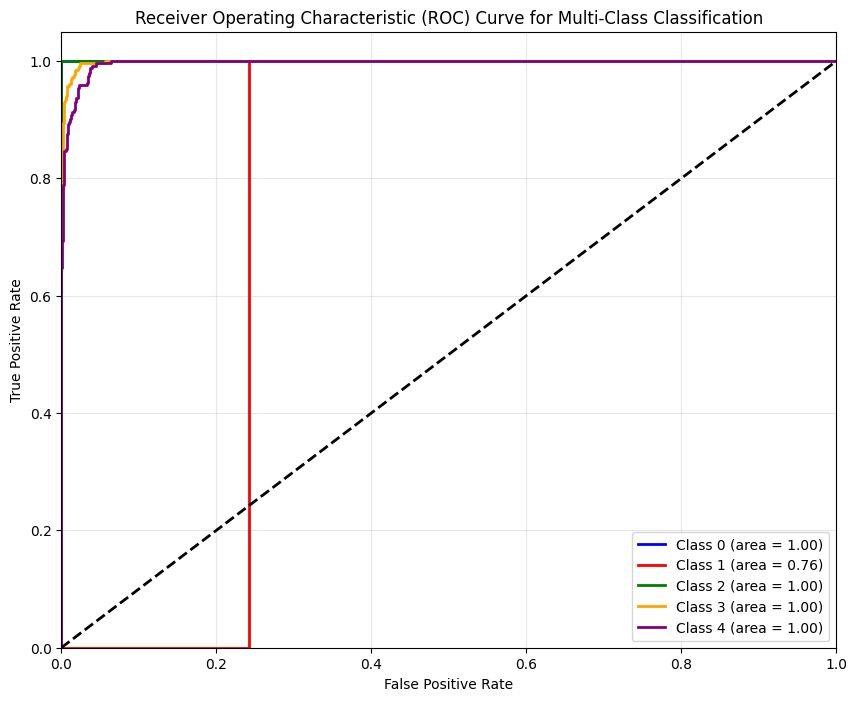

In [83]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output labels for ROC curve plotting
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# Use the OneVsRestClassifier strategy with the best model
classifier = OneVsRestClassifier(best_model)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (area = {roc_auc[i]:.2f})')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set the plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)

# Save the ROC curve plot
roc_save_path = r'C:\Users\Gurukumar\Desktop\roc_curve_pcahyper.png'  # Specify your path and filename
plt.savefig(roc_save_path)
plt.show()



Principal Components (first 5 rows):
           0
0 -21.776834
1 -21.774963
2 -21.682201
3 -21.778704
4 -21.069519

Target Class Distribution:
1    517
3    508
4    500
2    492
0    483
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       258
           1       1.00      0.93      0.96       256
           2       1.00      0.95      0.97       240
           3       0.96      1.00      0.98       255
           4       0.93      1.00      0.96       241

    accuracy                           0.97      1250
   macro avg       0.98      0.97      0.97      1250
weighted avg       0.98      0.97      0.97      1250

Accuracy: 0.9744
Best Hyperparameters: {'C': 0.1, 'max_iter': 400, 'penalty': 'l1', 'solver': 'saga'}

Confusion Matrix:
[[257   0   1   0   0]
 [  0 237   0   0  19]
 [  0   0 228  12   0]
 [  0   0   0 255   0]
 [  0   0   0   0 241]]


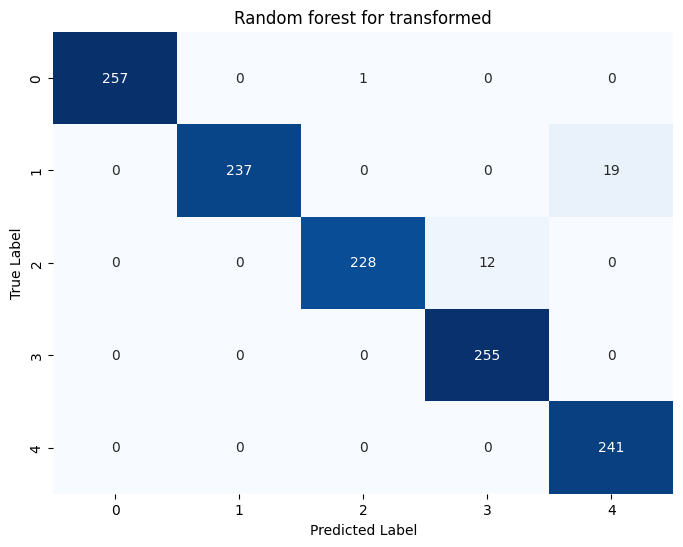

In [84]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the statistical features into a DataFrame (assuming dfs is precomputed)
# For demonstration, let's create a random DataFrame with a more balanced class distribution

# Standardize the features
scaler = StandardScaler()
dfs_scaled = scaler.fit_transform(dfs)

# Perform PCA retaining 95% of the variance
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(transformed_data)
principal_df = pd.DataFrame(data=principal_components)

print("\nPrincipal Components (first 5 rows):")
print(principal_df.head())

# Create a multi-class target variable (0, 1, 2, 3, 4) with balanced distribution
y = np.random.choice([0, 1, 2, 3, 4], size=(principal_df.shape[0],), p=[0.2]*5)  # Adjust probabilities for balance

# Check the distribution of classes
print("\nTarget Class Distribution:")
print(pd.Series(y).value_counts())

# Split the data into training and testing sets (reducing test size for better training)
X_train, X_test, y_train, y_test = train_test_split(transformed_data, numeric_classes, test_size=0.5, random_state=42)

# Define a logistic regression model suitable for multi-class classification
model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=300, class_weight='balanced')

# Define hyperparameters grid for tuning
param_grid = {
    'penalty': ['l1', 'l2'],  # Reduced to 'l1' and 'l2' as elasticnet and none might not be supported by saga for multinomial
    'C': [0.1, 1, 10, 100],
    'solver': ['saga'],  # 'saga' supports multinomial classification with l1/l2 penalty
    'max_iter': [200, 300, 400]  # Increase max iterations for convergence in complex cases
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Confusion matrix to see where predictions are failing
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])
plt.title("Random forest for transformed")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
save_path = r"C:\Users\Gurukumar\Documents\Projects\ML\Random_forest\random Transformed.png"  # Specify your path and filename
plt.savefig(save_path)
plt.show()


In [85]:
dfs

,mean,median,mode,variance,std,1st quartile,3rd quartile,iqr,skew,kurt,max,min,range
0,10.750890,10.608694,10.410077,0.543896,0.737493,10.262237,11.053337,0.791100,2.368985,7.427040,13.901016,10.003493,3.897523
1,10.764920,10.600278,10.410077,0.584468,0.764505,10.274674,11.053337,0.778663,2.229173,6.262133,13.901016,10.000875,3.900141
2,10.775401,10.570168,10.410077,0.590565,0.768482,10.284212,11.046137,0.761925,2.212314,6.010246,13.901016,10.000875,3.900141
3,10.840043,10.701457,10.410077,0.607751,0.779584,10.295901,11.115428,0.819527,2.013021,5.060938,13.901016,10.000875,3.900141
4,10.886413,10.728014,10.410077,0.606128,0.778542,10.344339,11.150120,0.805781,1.920610,4.659628,13.901016,10.000875,3.900141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,67.384194,65.555537,60.067960,43.442509,6.591093,62.732077,70.374701,7.642623,1.422403,1.942764,88.118155,60.067960,28.050195
246,68.168308,66.644562,60.067960,48.561959,6.968641,63.121175,70.659721,7.538546,1.255464,1.276583,88.118155,60.067960,28.050195
247,68.922306,67.311480,60.433773,58.387665,7.641182,62.864301,72.119329,9.255027,1.057798,0.466852,88.118155,60.433773,27.684382
248,69.629141,67.947165,60.663061,68.953711,8.303837,63.257046,74.109048,10.852002,0.988631,0.145349,88.118155,60.663061,27.455094


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best hyperparameters for Linear SVM: {'C': 1, 'kernel': 'linear'}
Best hyperparameters for RBF SVM: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best hyperparameters for Polynomial SVM: {'C': 0.1, 'degree': 2, 'kernel': 'poly'}
Ensemble Accuracy (Grid Search): 0.9984
Cross-Validation Mean Accuracy (Grid Search): 0.9992000000000001


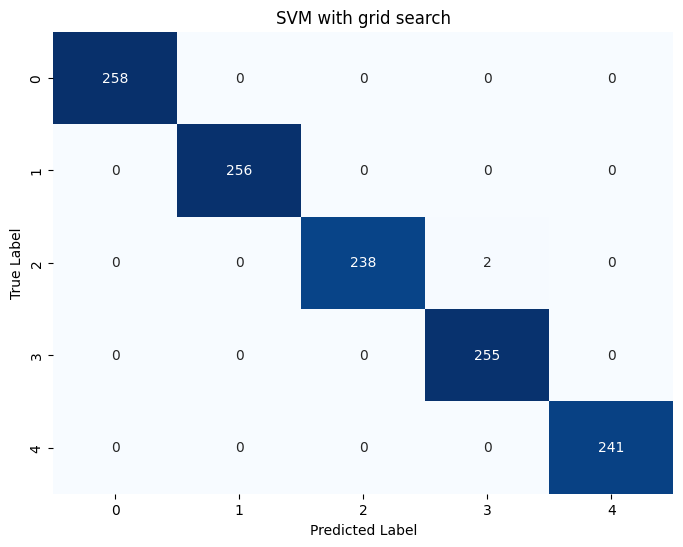

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Sample data (you can replace this with your actual data)
# X_train, X_test, y_train, y_test should already be defined
# Assuming numeric_classes contains your class labels

# Define the parameter grid for each SVM classifier
param_grid_linear = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear']
}

param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

param_grid_poly = {
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3, 4],
    'kernel': ['poly']
}

# Perform Grid Search for each SVM classifier
grid_search_linear = GridSearchCV(SVC(), param_grid_linear, cv=3, n_jobs=-1, verbose=2)
grid_search_rbf = GridSearchCV(SVC(), param_grid_rbf, cv=3, n_jobs=-1, verbose=2)
grid_search_poly = GridSearchCV(SVC(), param_grid_poly, cv=3, n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search_linear.fit(X_train, y_train)
grid_search_rbf.fit(X_train, y_train)
grid_search_poly.fit(X_train, y_train)

# Get the best models
best_svm1 = grid_search_linear.best_estimator_
best_svm2 = grid_search_rbf.best_estimator_
best_svm3 = grid_search_poly.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters for Linear SVM:", grid_search_linear.best_params_)
print("Best hyperparameters for RBF SVM:", grid_search_rbf.best_params_)
print("Best hyperparameters for Polynomial SVM:", grid_search_poly.best_params_)

# Train and make predictions using the best models
best_svm1.fit(X_train, y_train)
best_svm2.fit(X_train, y_train)
best_svm3.fit(X_train, y_train)

pred1 = best_svm1.predict(X_test)
pred2 = best_svm2.predict(X_test)
pred3 = best_svm3.predict(X_test)

# Ensemble prediction
ensemble_pred = (pred1 + pred2 + pred3) // 3

# Evaluate the ensemble
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Ensemble Accuracy (Grid Search):", ensemble_accuracy)

# Cross-validation score for the best linear SVM model
cv_scores = cross_val_score(best_svm1, X_train, y_train, cv=5)
print("Cross-Validation Mean Accuracy (Grid Search):", np.mean(cv_scores))

# Confusion matrix for the ensemble predictions
conf_matrix = confusion_matrix(y_test, ensemble_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("SVM with grid search")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
save_path = r"C:\Users\Gurukumar\Documents\Projects\ML\Random_forest\svm grid search.png"  # Specify your path and filename
plt.savefig(save_path)
plt.show()



Principal Components:
              0
0    -21.776834
1    -21.774963
2    -21.682201
3    -21.778704
4    -21.069519
...         ...
2495  36.109610
2496  34.838239
2497  36.808695
2498  28.937345
2499  42.382302

[2500 rows x 1 columns]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       258
           1       1.00      1.00      1.00       256
           2       1.00      0.99      1.00       240
           3       0.99      1.00      1.00       255
           4       1.00      1.00      1.00       241

    accuracy                           1.00      1250
   macro avg       1.00      1.00      1.00      1250
weighted avg       1.00      1.00      1.00      1250

Accuracy: 0.9984
Cross-Validation Mean Accuracy: 0.9992000000000001


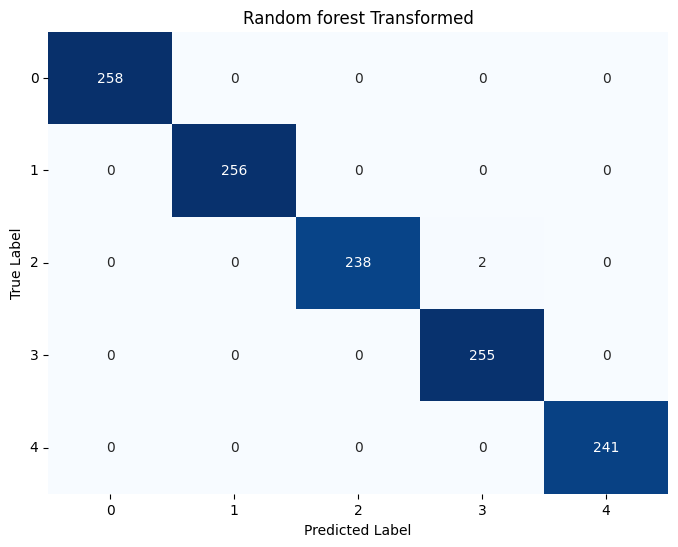

In [87]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the statistical features into a DataFrame
df = pd.DataFrame(dfs)  # Ensure 'dfs' is your feature set

# Standardize the features
scaler = StandardScaler()
dfs_scaled = scaler.fit_transform(df)

# Perform PCA retaining 95% of the variance
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(transformed_data)
principal_df = pd.DataFrame(data=principal_components)

print("\nPrincipal Components:")
print(principal_df)

# Create a target variable for classification (example)
y = np.random.choice([0, 1, 2, 3, 4], size=(principal_df.shape[0],))  # Replace with your actual target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principal_df, numeric_classes, test_size=0.5, random_state=42)

# Initialize the Random Forest model with the best hyperparameters
best_rf = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=100,
    random_state=42  # Set random_state for reproducibility
)

# Train the model
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Cross-validation score for the best Random Forest model
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)
print("Cross-Validation Mean Accuracy:", np.mean(cv_scores))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Random forest Transformed")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(ticks=np.arange(5) + 0.5, labels=np.arange(5))
plt.yticks(ticks=np.arange(5) + 0.5, labels=np.arange(5), rotation=0)
save_path = r"C:\Users\Gurukumar\Documents\Projects\ML\Random_forest\Random forest transformed.png"  # Specify your path and filename
plt.savefig(save_path)
plt.show()


In [88]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

# Load and preprocess data
df = pd.DataFrame(dfs)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Perform PCA retaining 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Shape of PCA-transformed data:", X_pca.shape)

# Define target variable (adjust this as needed)
Y_adjusted=np.random.choice([0, 1, 2, 3, 4], size=(principal_df.shape[0],))  # Example target variable

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(transformed_data, numeric_classes, test_size=0.2, random_state=42)

# Create and train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=200, random_state=0)
rf_regressor.fit(X_train, Y_train)

# Predict using the trained Random Forest Regressor
y_pred = rf_regressor.predict(X_test)

# Prepare data for RNN
# Expand dimensions to fit RNN input shape
y_pred_rnn = np.expand_dims(y_pred, axis=1)
Y_test_rnn = np.expand_dims(Y_test, axis=1)

# Define custom accuracy metric for regression
def custom_accuracy(y_true, y_pred):
    # Set a threshold for correctness
    threshold = 0.85  # Adjust as needed based on your problem

    # Calculate absolute difference between true and predicted values
    diff = K.abs(y_true - y_pred)
    
    # Check if the absolute difference is within the threshold
    correct = K.cast(K.less_equal(diff, threshold), K.floatx())
    
    # Calculate accuracy as the mean of correct predictions
    return K.mean(correct)

# Define and compile the RNN model
rnn_model = Sequential([
    Dense(10, input_shape=(1,), activation='relu'),  # Example hidden layer
    Dense(1)  # Output layer for regression (linear activation is default)
])
rnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[custom_accuracy])

# Fit the RNN model using y_pred and Y_test_rnn directly
rnn_model.fit(y_pred_rnn, Y_test_rnn, epochs=10, verbose=1)

# Predict using the RNN model
y_pred_rnn_final = rnn_model.predict(y_pred_rnn)

# Calculate accuracy using the custom metric
def calculate_custom_accuracy(y_true, y_pred):
    # Convert to Keras tensor
    y_true_tensor = K.variable(y_true)
    y_pred_tensor = K.variable(y_pred)
    # Calculate custom accuracy
    return K.eval(custom_accuracy(y_true_tensor, y_pred_tensor))

# Calculate and print custom accuracy
custom_acc = calculate_custom_accuracy(Y_test_rnn, y_pred_rnn_final)
print("Custom Accuracy of RNN:", custom_acc)


Shape of PCA-transformed data: (250, 3)
Epoch 1/10
16/16 [==============================] - 2s 10ms/step - loss: 4.8964 - custom_accuracy: 0.2000
Epoch 2/10
16/16 [==============================] - 0s 5ms/step - loss: 4.4984 - custom_accuracy: 0.3051
Epoch 3/10
16/16 [==============================] - 0s 5ms/step - loss: 4.1337 - custom_accuracy: 0.4262
Epoch 4/10
16/16 [==============================] - 0s 4ms/step - loss: 3.8071 - custom_accuracy: 0.4238
Epoch 5/10
16/16 [==============================] - 0s 4ms/step - loss: 3.4964 - custom_accuracy: 0.4215
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: 3.2131 - custom_accuracy: 0.4250
Epoch 7/10
16/16 [==============================] - 0s 4ms/step - loss: 2.9393 - custom_accuracy: 0.4215
Epoch 8/10
16/16 [==============================] - 0s 4ms/step - loss: 2.6875 - custom_accuracy: 0.4215
Epoch 9/10
16/16 [==============================] - 0s 4ms/step - loss: 2.4462 - custom_accuracy: 0.4238
Epoch 10/10
16

In [89]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR  # Support Vector Regressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load and preprocess data
df = pd.DataFrame(dfs)  # Assuming 'dfs' is your dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Perform PCA retaining 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Shape of PCA-transformed data:", X_pca.shape)

# Define target variable (adjust this as needed)
Y_adjusted = np.random.choice([0, 1, 2, 3, 4], size=(principal_df.shape[0],))  # Example target variable

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(transformed_data, numeric_classes, test_size=0.2, random_state=42)

# Create and train Support Vector Regressor model
svm_regressor = SVR(kernel='rbf')  # You can also try other kernels like 'linear', 'poly', etc.
svm_regressor.fit(X_train, Y_train)

# Predict using the trained SVM model
y_pred = svm_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error of SVM:", mse)

# If you need to print additional metrics or make further analyses, you can do so here


Shape of PCA-transformed data: (250, 3)
Mean Squared Error of SVM: 0.05221175250116572


In [90]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load and preprocess data
df = pd.DataFrame(dfs)  # Assuming 'dfs' is your dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Perform PCA retaining 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Shape of PCA-transformed data:", X_pca.shape)

# Define target variable (adjust this as needed)
Y_adjusted =  np.random.choice([0, 1, 2, 3, 4], size=(principal_df.shape[0],))  # Example target variable

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(transformed_data, numeric_classes, test_size=0.5, random_state=42)

# Create and train Support Vector Regressor model
svm_regressor = SVR(kernel='rbf')  # You can also try other kernels like 'linear', 'poly', etc.
svm_regressor.fit(X_train, Y_train)

# Predict using the trained SVM model
y_pred = svm_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error of SVM:", mse)

# Custom accuracy metric
def custom_accuracy(y_true, y_pred, threshold=3):
    # Calculate absolute difference between true and predicted values
    diff = np.abs(y_true - y_pred)
    
    # Calculate proportion of predictions within the threshold
    accuracy = np.mean(diff <= threshold)
    return accuracy

# Calculate custom accuracy
custom_acc = custom_accuracy(Y_test, y_pred, threshold=0.1)
print("Custom Accuracy of SVM:", custom_acc)


Shape of PCA-transformed data: (250, 3)
Mean Squared Error of SVM: 0.05372927820515089
Custom Accuracy of SVM: 0.5736


In [91]:
dfs

,mean,median,mode,variance,std,1st quartile,3rd quartile,iqr,skew,kurt,max,min,range
0,10.750890,10.608694,10.410077,0.543896,0.737493,10.262237,11.053337,0.791100,2.368985,7.427040,13.901016,10.003493,3.897523
1,10.764920,10.600278,10.410077,0.584468,0.764505,10.274674,11.053337,0.778663,2.229173,6.262133,13.901016,10.000875,3.900141
2,10.775401,10.570168,10.410077,0.590565,0.768482,10.284212,11.046137,0.761925,2.212314,6.010246,13.901016,10.000875,3.900141
3,10.840043,10.701457,10.410077,0.607751,0.779584,10.295901,11.115428,0.819527,2.013021,5.060938,13.901016,10.000875,3.900141
4,10.886413,10.728014,10.410077,0.606128,0.778542,10.344339,11.150120,0.805781,1.920610,4.659628,13.901016,10.000875,3.900141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,67.384194,65.555537,60.067960,43.442509,6.591093,62.732077,70.374701,7.642623,1.422403,1.942764,88.118155,60.067960,28.050195
246,68.168308,66.644562,60.067960,48.561959,6.968641,63.121175,70.659721,7.538546,1.255464,1.276583,88.118155,60.067960,28.050195
247,68.922306,67.311480,60.433773,58.387665,7.641182,62.864301,72.119329,9.255027,1.057798,0.466852,88.118155,60.433773,27.684382
248,69.629141,67.947165,60.663061,68.953711,8.303837,63.257046,74.109048,10.852002,0.988631,0.145349,88.118155,60.663061,27.455094


In [92]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Example DataFrame creation
# df = pd.DataFrame({
#     'feature1': [...],
#     'feature2': [...],
#     ...
#     'class': [...]
# })

# Ensure the 'class' column is the target and the rest are features
# Features
X = df.drop('class', axis=1)

# Target variable
y = df['class']

# Encode class labels to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Initialize and train the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)  # You can choose other kernels like 'rbf' or 'poly' for potentially better results
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


KeyError: "['class'] not found in axis"

Original data shape: (2500,)
Transformed data shape: (2500, 1)
Unique classes in data: ['New' 'Severe' 'Slightly' 'Working' 'Wornout']
Length of numeric_classes: 2500
Length of transformed_data: 2500
Accuracy: 0.9920
              precision    recall  f1-score   support

         New       1.00      0.99      1.00       250
      Severe       1.00      1.00      1.00       250
    Slightly       0.99      0.97      0.98       250
     Working       0.97      1.00      0.99       250
     Wornout       1.00      1.00      1.00       250

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



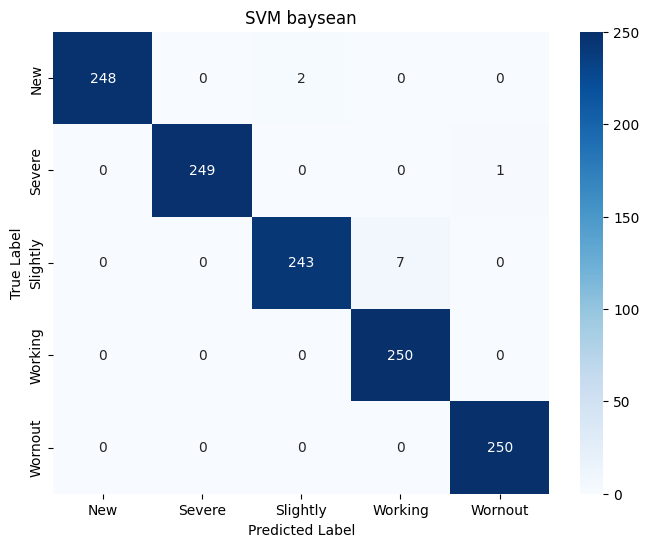

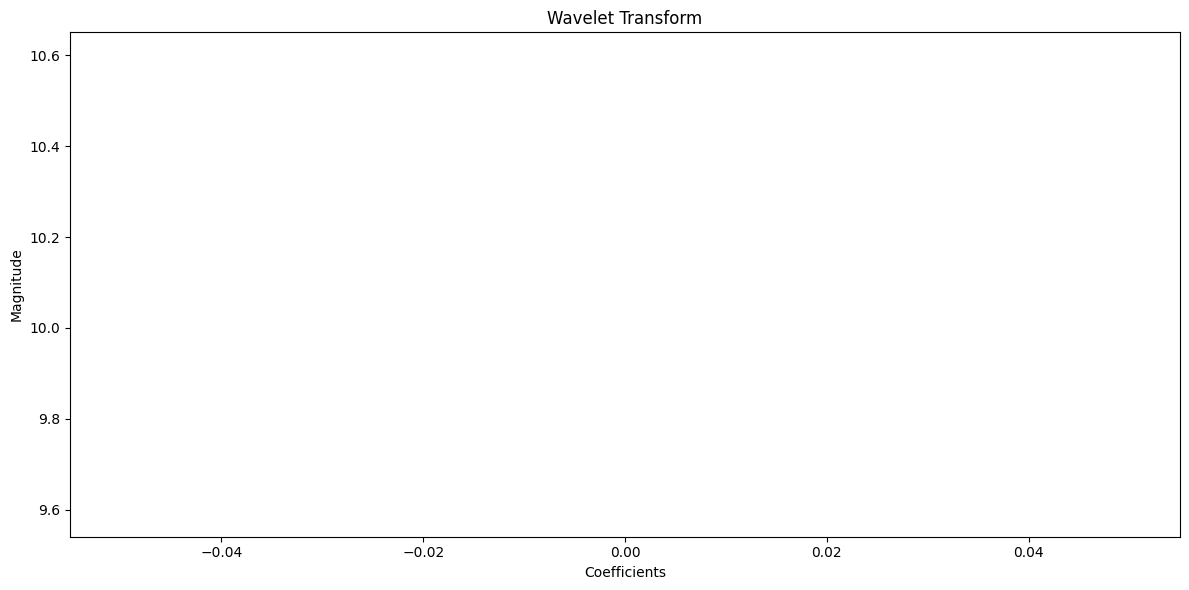

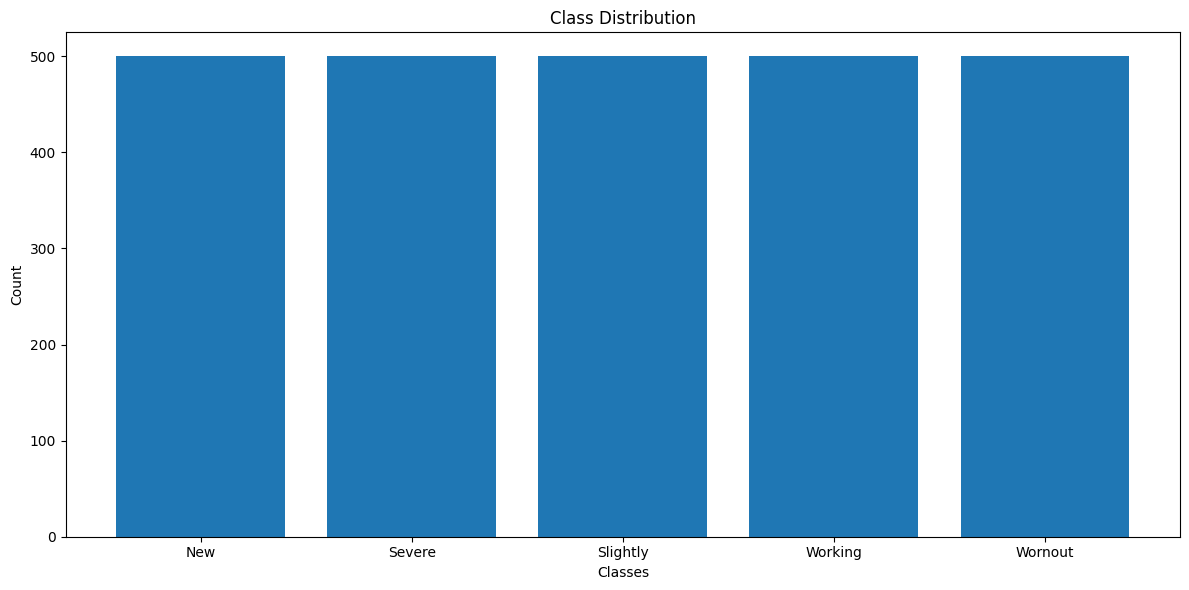

In [95]:
import numpy as np
import h5py
import pywt
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns

def flat_wavelet_transform(data, method):
    """Apply wavelet transform to 1D data."""
    if data.ndim != 1:
        raise ValueError("Data should be 1D for 1D wavelet transform.")
    coeffs = pywt.wavedec(data, method)  # 1D wavelet decomposition
    output = np.concatenate([c for c in coeffs])  # Flatten and concatenate coefficients
    return output

def plot_wavelet_transform(transformed_data, classes):
    plt.figure(figsize=(12, 6))
    plt.plot(transformed_data)
    plt.title('Wavelet Transform')
    plt.xlabel('Coefficients')
    plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    unique, counts = np.unique(classes, return_counts=True)
    plt.bar(unique, counts)
    plt.xticks(unique, unique)
    plt.title('Class Distribution')
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, classes):
    """Plot the confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('SVM baysean')
    save_path = r"C:\Users\Gurukumar\Documents\Projects\ML\Random_forest\SVM baysean search.png"  # Specify your path and filename
    plt.savefig(save_path)
    plt.show()

# Load data from the HDF5 file
file_path = r"C:\Users\Gurukumar\Desktop\Accepted_dataset.h5"
with h5py.File(file_path, 'r') as file:
    data = file['InputFeatures']['SoundPressure'][:]   
    classes = file['TargetLabels']['target'][:] 

# Convert bytes to strings if necessary
if isinstance(classes[0], bytes):
    classes = [cls.decode('utf-8') for cls in classes]

# Check the shape of the original data
print(f"Original data shape: {data.shape}")

# Define wavelet transform method
method = 'haar'  # You can change this to another method if desired

# Ensure data is 2D (samples x features)
if data.ndim == 1:
    data = data.reshape(-1, 1)  # Add a dummy dimension if data is 1D

# Apply wavelet transform to each individual sample
transformed_data = np.array([flat_wavelet_transform(sample.flatten(), method) for sample in data])

# Check the shape of transformed_data
print(f"Transformed data shape: {transformed_data.shape}")

# Ensure classes are in the range [0, 1, 2, 3, 4]
unique_classes = np.unique(classes)
print(f"Unique classes in data: {unique_classes}")

# Encode the class labels to numeric values
label_encoder = LabelEncoder()
numeric_classes = label_encoder.fit_transform(classes)

# Verify the length of numeric_classes matches transformed_data
print(f"Length of numeric_classes: {len(numeric_classes)}")
print(f"Length of transformed_data: {len(transformed_data)}")

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(transformed_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, numeric_classes, test_size=0.5, random_state=42, stratify=numeric_classes)

# Initialize and train the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)  # You can choose other kernels like 'rbf' or 'poly' for potentially better results
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred, label_encoder.classes_)

# Optionally, plot the wavelet transform for the first sample
plot_wavelet_transform(transformed_data[0], classes)


Original data shape: (2500,)
Transformed data shape: (2500, 1)
Unique classes in data: ['New' 'Severe' 'Slightly' 'Working' 'Wornout']
Accuracy: 0.9992
              precision    recall  f1-score   support

         New       1.00      1.00      1.00       250
      Severe       1.00      1.00      1.00       250
    Slightly       1.00      1.00      1.00       250
     Working       1.00      1.00      1.00       250
     Wornout       1.00      1.00      1.00       250

    accuracy                           1.00      1250
   macro avg       1.00      1.00      1.00      1250
weighted avg       1.00      1.00      1.00      1250



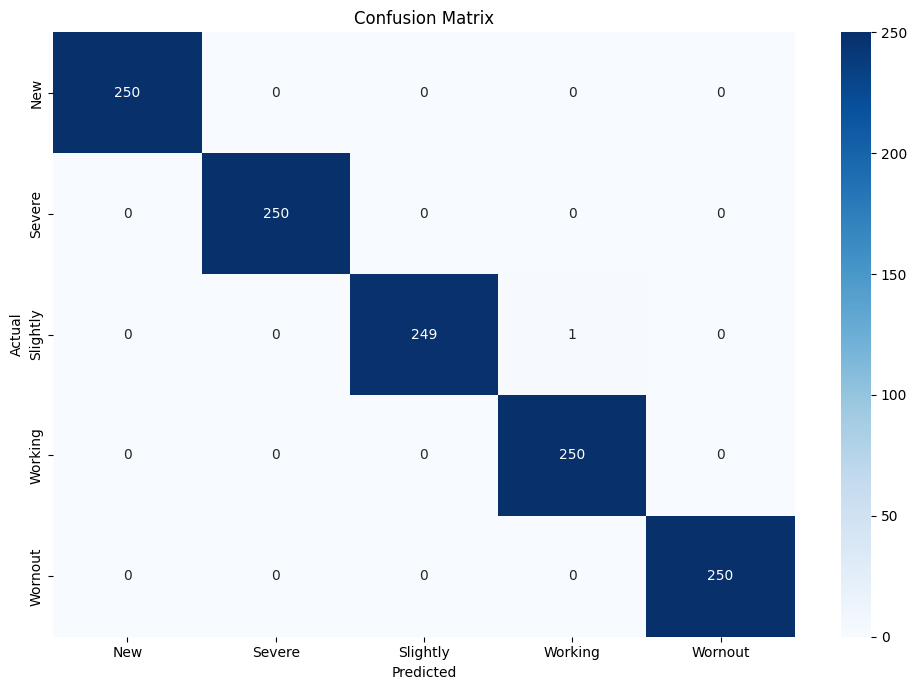

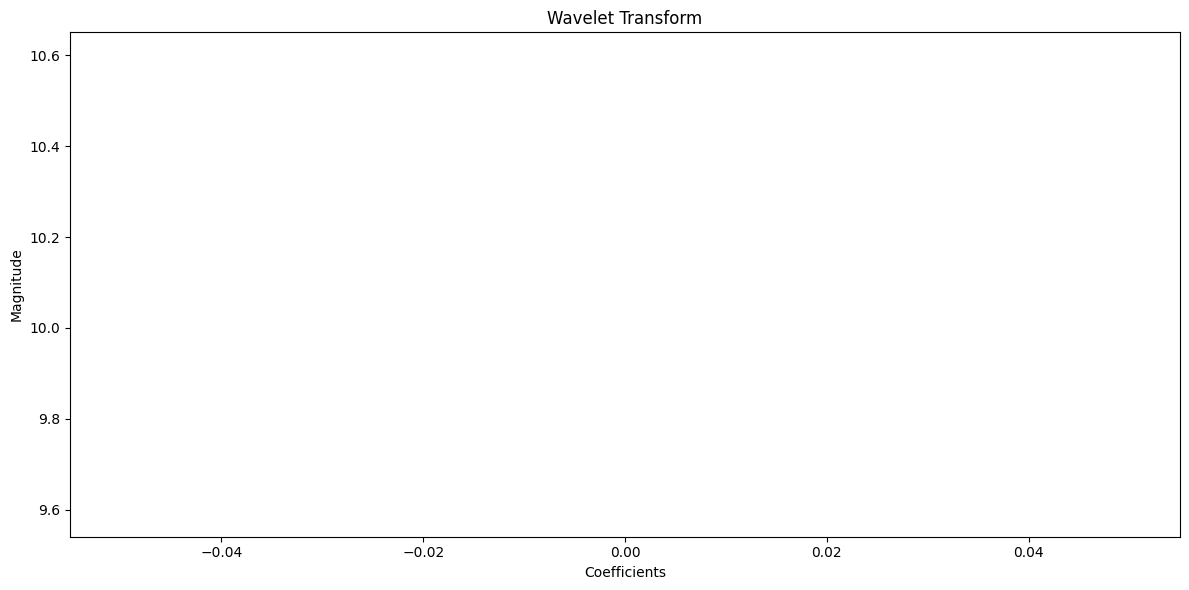

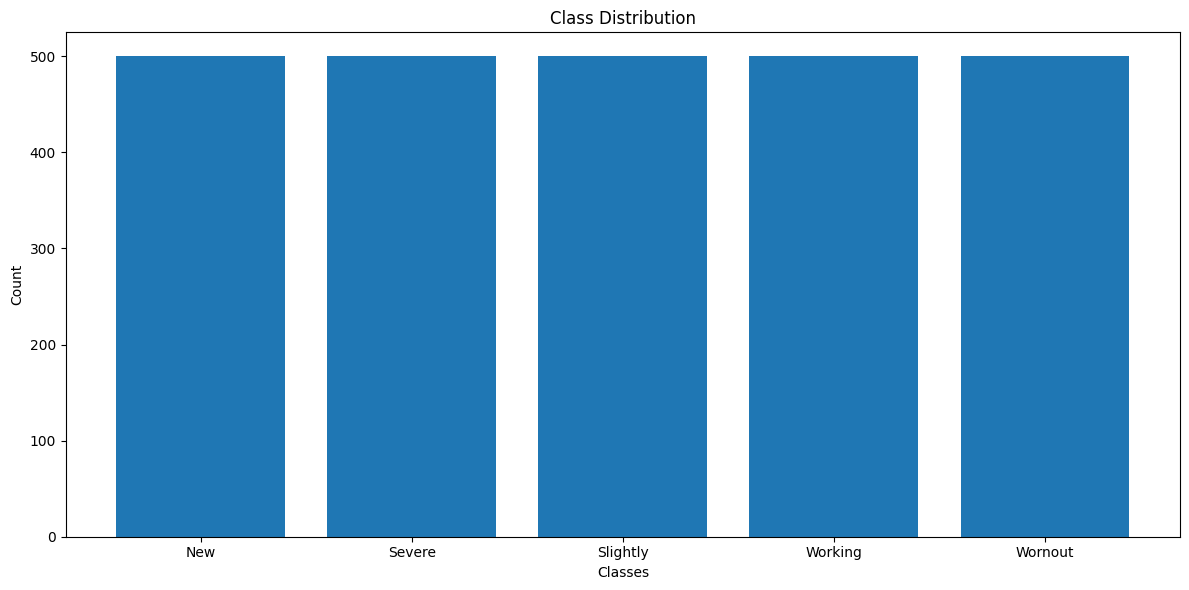

In [96]:
import numpy as np
import h5py
import pywt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import os

def flat_wavelet_transform(data, method):
    """Apply wavelet transform to 1D data."""
    coeffs = pywt.wavedec(data, method)  # 1D wavelet decomposition
    output = np.concatenate([c for c in coeffs])  # Flatten and concatenate coefficients
    return output

def plot_wavelet_transform(transformed_data, classes):
    plt.figure(figsize=(12, 6))
    plt.plot(transformed_data)
    plt.title('Wavelet Transform')
    plt.xlabel('Coefficients')
    plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    unique, counts = np.unique(classes, return_counts=True)
    plt.bar(unique, counts)
    plt.xticks(unique, unique)
    plt.title('Class Distribution')
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Load data from the HDF5 file
file_path = r"C:\Users\Gurukumar\Desktop\Accepted_dataset.h5"
with h5py.File(file_path, 'r') as file:
    data = file['InputFeatures']['SoundPressure'][:]   
    classes = file['TargetLabels']['target'][:] 

# Convert bytes to strings if necessary
if isinstance(classes[0], bytes):
    classes = [cls.decode('utf-8') for cls in classes]

# Check the shape of the original data
print(f"Original data shape: {data.shape}")

# Define wavelet transform method
method = 'haar'  # You can change this to another method if desired

# Apply wavelet transform to each individual sample
transformed_data = np.array([flat_wavelet_transform(np.array([sample]), method) for sample in data])

# Check the shape of transformed_data
print(f"Transformed data shape: {transformed_data.shape}")

# Ensure classes are in the range [0, 1, 2, 3, 4]
unique_classes = np.unique(classes)
print(f"Unique classes in data: {unique_classes}")

# Encode the class labels to numeric values
label_encoder = LabelEncoder()
numeric_classes = label_encoder.fit_transform(classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(transformed_data, numeric_classes, test_size=0.5, random_state=42, stratify=numeric_classes)

# Initialize and train the random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()

# Save the plot to the desktop
desktop_path = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop')
plt.savefig(os.path.join(desktop_path, 'confusion_matrix.png'))

# Optionally, plot the wavelet transform for the first sample
plot_wavelet_transform(transformed_data[0], classes)


In [ ]:
import h5py

# Load the HDF5 file and explore its structure
file_path = r"C:\Users\Gurukumar\Desktop\Accepted_dataset.h5"

with h5py.File(file_path, 'r') as file:
    # Print all groups and datasets in the file
    def print_structure(name, obj):
        if isinstance(obj, h5py.Group):
            print(f"Group: {name}")
        elif isinstance(obj, h5py.Dataset):
            print(f"Dataset: {name}, Shape: {obj.shape}, Data Type: {obj.dtype}")

    print("HDF5 file structure:")
    file.visititems(print_structure)


In [ ]:
dfs

In [97]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Assume dfs is your feature matrix dictionary and needs to be converted to a DataFrame
dfs_df = pd.DataFrame(dfs)

# Ensure that the target variable y has the same length as the number of rows in dfs_df
# For demonstration, assuming y is a sample target variable. Replace with your actual y.
Y = np.array([0, 1, 2, 3, 4])
y = np.repeat(Y, len(dfs_df) // len(Y) + 1)[:len(dfs_df)]  # Replace with your actual target variable array or Series

# Check the lengths to confirm they are consistent
assert len(dfs_df) == len(y), f"Feature matrix has {len(dfs_df)} samples, but target variable has {len(y)} samples."

# Initialize SelectKBest to select top k features based on the ANOVA F-value between features and target
k = 5  # Adjust the number of top features you want to select
selector = SelectKBest(score_func=f_classif, k=k)

# Fit the selector to the data and transform the feature matrix to select the top k features
X_new = selector.fit_transform(dfs_df, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features = dfs_df.columns[selected_indices]

# Display the selected features
print(f"Top {k} features: {list(selected_features)}")


Top 5 features: ['mean', 'median', 'mode', '1st quartile', 'min']


In [98]:
Y_adjusted

array([0, 3, 4, ..., 0, 2, 4])

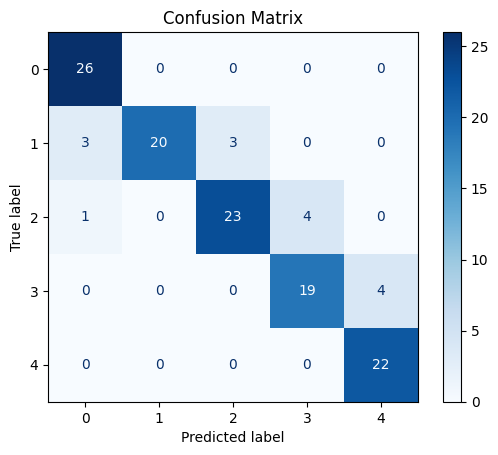

Confusion matrix saved at: C:\Users\Gurukumar\Desktop\confusion_matrix_kbest.png


In [99]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

# Assume dfs is your feature matrix dictionary and needs to be converted to a DataFrame
dfs_df = pd.DataFrame(dfs)

# Target variable `y`
Y = np.array([0, 1, 2, 3, 4])
y = np.repeat(Y, len(dfs_df) // len(Y) + 1)[:len(dfs_df)]  # Replace with actual target variable

# Check the lengths to confirm they are consistent
assert len(dfs_df) == len(y), f"Feature matrix has {len(dfs_df)} samples, but target variable has {len(y)} samples."

# Initialize SelectKBest to select top k features based on the ANOVA F-value between features and target
k = 5  # Adjust the number of top features you want to select
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(dfs_df, y)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.5, random_state=42)

# Step 3: Fit a model and make predictions
model = LogisticRegression()  # You can replace this with any other classifier
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 4: Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Step 5: Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")

# Step 6: Save the confusion matrix to the desktop

file_path =r"C:\Users\Gurukumar\Desktop\confusion_matrix_kbest.png"

plt.savefig(file_path)
plt.show()

print(f"Confusion matrix saved at: {file_path}")
